In [1]:
import numpy as np
import pandas as pd
import os
import SAGEnet.plot
import SAGEnet.tools
import seaborn as sb
import matplotlib.pyplot as plt
import scipy.stats
import random
from plot_results import save_boxplots,save_corr_from_per_gene

/homes/gws/aspiro17/miniconda3/envs/SAGEnet/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/homes/gws/aspiro17/miniconda3/envs/SAGEnet/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


#### load rosmap & gtex expression data

In [29]:
gtex_expr_data_path='/data/tuxm/GTEX_v8/Brain-Cortex_covariate_adjusted_log_tpm.csv'
gtex_expr_data = pd.read_csv(gtex_expr_data_path, index_col=0)
subs = ['-'.join(item.split('-')[:2]) for item in gtex_expr_data.columns] # remove tissue label to match vcf
gtex_expr_data.columns = subs

rosmap_expr_data_path='/data/mostafavilab/personal_genome_expr/data/rosmap/expressionData/vcf_match_covariate_adjusted_log_tpm.csv'
rosmap_expr_data = pd.read_csv(rosmap_expr_data_path, index_col=0)

predixcan_res_path='/homes/gws/aspiro17/seqtoexp/PersonalGenomeExpression-dev/results_data/predixcan/rosmap_pearson_corr.csv'
all_top_1000_gene_set = SAGEnet.tools.select_region_set(predixcan_res_path, rand_regions=0,num_regions=1000,region_idx_start=0) 
all_top_1000_train, all_top_1000_val , all_top_1000_test = SAGEnet.tools.get_train_val_test_genes(all_top_1000_gene_set)

top_1000_gene_set=np.array([gene for gene in all_top_1000_gene_set if gene in gtex_expr_data.index])
top_1000_train, top_1000_val , top_1000_test = SAGEnet.tools.get_train_val_test_genes(top_1000_gene_set)

sub_data_dir='/homes/gws/aspiro17/seqtoexp/PersonalGenomeExpression-dev/input_data/individual_sets/'
rosmap_train_subs = np.loadtxt(f'{sub_data_dir}ROSMAP/train_subs.csv',delimiter=',',dtype=str)
rosmap_val_subs = np.loadtxt(f'{sub_data_dir}ROSMAP/val_subs.csv',delimiter=',',dtype=str)
rosmap_test_subs = np.loadtxt(f'{sub_data_dir}ROSMAP/test_subs.csv',delimiter=',',dtype=str)

fig_save_dir='/homes/gws/aspiro17/SAGEnet/plot_figs/figs/'

selecting regions from 0 to 1000
selecting train/val/test gene sets based on chromosome split
selecting train/val/test gene sets based on chromosome split


#### performance compared to baselines

In [3]:
rosmap_predixcan_corr = pd.read_csv('/data/mostafavilab/personal_genome_expr/predixcan_res/rosmap/40k/MAF_0.01/pearson_corr.csv',index_col=0)
gtex_predixcan_corr = pd.read_csv('/data/mostafavilab/personal_genome_expr/predixcan_res/gtex/40k/MAF_0.01/pearson_corr_cortex.csv',index_col=0)

rosmap_enformer_corr = pd.read_csv('/data/mostafavilab/personal_genome_expr/final_results/enformer/rosmap/test_subs/per_gene_pearson_corr.csv',index_col=0)
gtex_enformer_corr = pd.read_csv('/data/mostafavilab/personal_genome_expr/final_results/enformer/gtex/per_gene_pearson_corr.csv',index_col=0)

rosmap_da_corr=pd.read_csv('/data/mostafavilab/personal_genome_expr/da_models/1k_with_rc_22962405/metric_train_gene_gene/eval_on_individual/snps_and_indels/no_maf_filter/rosmap/test_subs/epoch=17.ckpt/per_gene_pearson_corr.csv',index_col=0)
gtex_da_corr=pd.read_csv('/data/mostafavilab/personal_genome_expr/da_models/1k_with_rc_22962405/metric_train_gene_gene/eval_on_individual/snps_and_indels/no_maf_filter/gtex/test_subs/epoch=17.ckpt/per_gene_pearson_corr.csv',index_col=0)

gtex_refcnn_corr=pd.read_csv('/data/mostafavilab/personal_genome_expr/ref_cnn_models/rc_neg_strand/job0/metric_train_gene_gene/eval_on_individual/snps_and_indels/no_maf_filter/gtex/test_subs/epoch=12-step=32045.ckpt/per_gene_pearson_corr.csv',index_col=0)
rosmap_refcnn_corr=pd.read_csv('/data/mostafavilab/personal_genome_expr/ref_cnn_models/rc_neg_strand/job0/metric_train_gene_gene/eval_on_individual/snps_and_indels/no_maf_filter/rosmap/test_subs/epoch=12-step=32045.ckpt/per_gene_pearson_corr.csv',index_col=0)

In [4]:
custom_palette = {
    'Enformer \n ROSMAP': sb.color_palette('colorblind')[0],
    'Enformer \n GTEx': sb.color_palette('colorblind')[0],
    'r-SAGE-net \n ROSMAP': sb.color_palette('colorblind')[1],
    'r-SAGE-net \n GTEx': sb.color_palette('colorblind')[1],
    'p-SAGE-net \n ROSMAP': sb.color_palette('colorblind')[2],
    'p-SAGE-net \n GTEx': sb.color_palette('colorblind')[2],
    'PrediXcan \n ROSMAP': sb.color_palette('colorblind')[3],
    'PrediXcan \n GTEx': sb.color_palette('colorblind')[3],
}

<Axes: title={'center': 'Train gene (n=734) per gene Pearson R'}, xlabel='Model and evaluation dataset', ylabel='Pearson R'>

<Figure size 640x480 with 0 Axes>

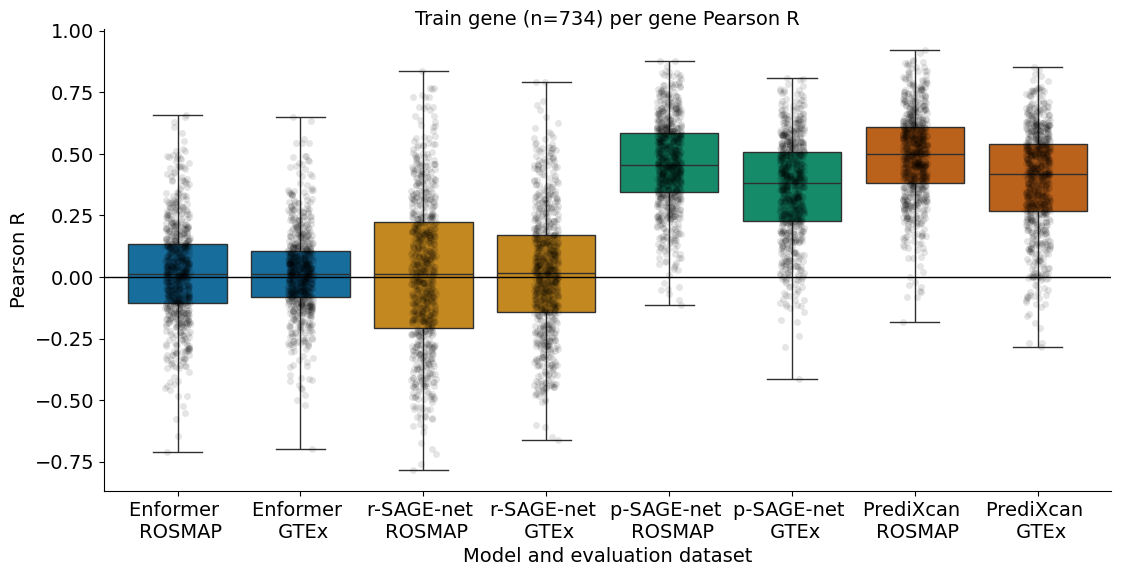

In [7]:
gene_set = top_1000_train

comb_res = pd.DataFrame(index=gene_set)
comb_res['Enformer \n ROSMAP'] = rosmap_enformer_corr.loc[gene_set]['pearson']
comb_res['Enformer \n GTEx'] = gtex_enformer_corr.loc[gene_set]['pearson']
comb_res['r-SAGE-net \n ROSMAP'] = rosmap_refcnn_corr.loc[gene_set]['pearson']
comb_res['r-SAGE-net \n GTEx'] = gtex_refcnn_corr.loc[gene_set]['pearson']
comb_res['p-SAGE-net \n ROSMAP'] = rosmap_da_corr.loc[gene_set]['pearson']
comb_res['p-SAGE-net \n GTEx'] = gtex_da_corr.loc[gene_set]['pearson']
comb_res['PrediXcan \n ROSMAP'] = rosmap_predixcan_corr.loc[gene_set]['test_pearson']
comb_res['PrediXcan \n GTEx'] = gtex_predixcan_corr.loc[gene_set]['pearson']

SAGEnet.plot.sb_plot(comb_res,custom_palette=custom_palette,fig_width=13,title=f'Train gene (n={len(comb_res)}) per gene Pearson R',xlabel='Model and evaluation dataset',ylabel='Pearson R',fontsize=14)

<Axes: title={'center': 'Test gene (n=116) per gene Pearson R'}, xlabel='Model and evaluation dataset', ylabel='Pearson R'>

<Figure size 640x480 with 0 Axes>

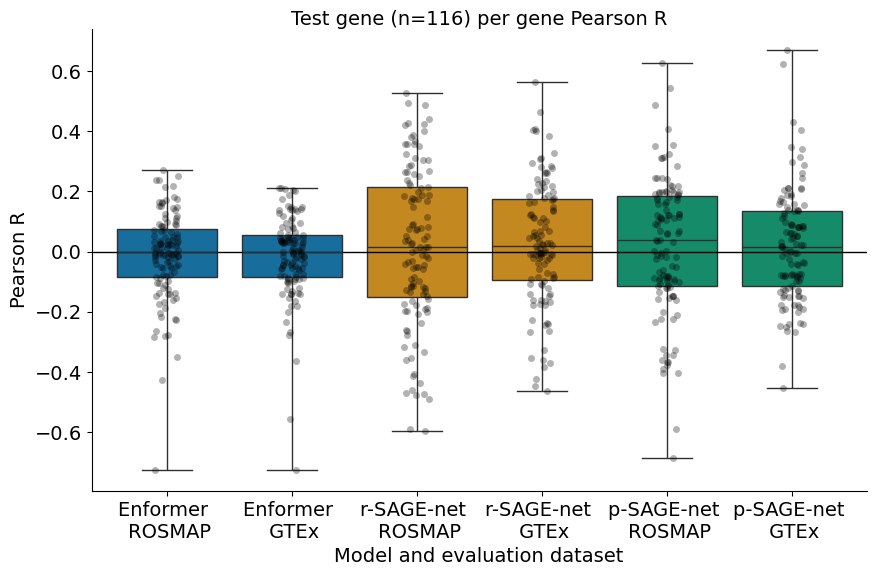

In [8]:
gene_set = top_1000_test

comb_res = pd.DataFrame(index=gene_set)
comb_res['Enformer \n ROSMAP'] = rosmap_enformer_corr.loc[gene_set]['pearson']
comb_res['Enformer \n GTEx'] = gtex_enformer_corr.loc[gene_set]['pearson']
comb_res['r-SAGE-net \n ROSMAP'] = rosmap_refcnn_corr.loc[gene_set]['pearson']
comb_res['r-SAGE-net \n GTEx'] = gtex_refcnn_corr.loc[gene_set]['pearson']
comb_res['p-SAGE-net \n ROSMAP'] = rosmap_da_corr.loc[gene_set]['pearson']
comb_res['p-SAGE-net \n GTEx'] = gtex_da_corr.loc[gene_set]['pearson']

SAGEnet.plot.sb_plot(comb_res,custom_palette=custom_palette,fig_width=10,title=f'Test gene (n={len(comb_res)}) per gene Pearson R',xlabel='Model and evaluation dataset',ylabel='Pearson R',fontsize=14,dot_alpha=.3)

/homes/gws/aspiro17/SAGEnet/SAGEnet/plot.py:230: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.stripplot(data=non_na_plot_df, color='black',


<Axes: title={'center': 'Validation gene across gene Pearson R'}, xlabel='Model', ylabel='Pearson R'>

<Figure size 640x480 with 0 Axes>

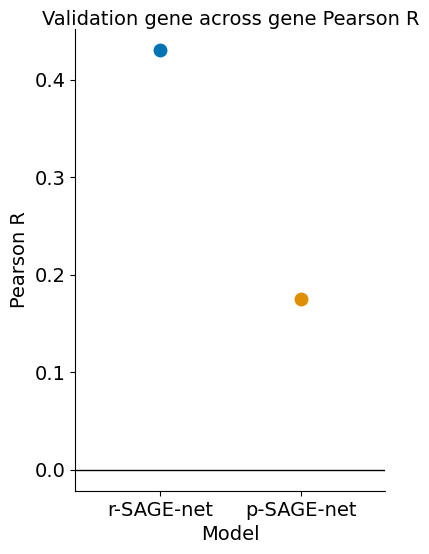

In [9]:
# top 1000 val across genes

gene_set=top_1000_val

rosmap_da_pred=pd.read_csv('/data/mostafavilab/personal_genome_expr/da_models/1k_with_rc_22962405/metric_train_gene_gene/eval_on_individual/snps_and_indels/no_maf_filter/rosmap/test_subs/epoch=17.ckpt/mean_predictions.csv',index_col=0)
rosmap_refcnn_pred=pd.read_csv('/data/mostafavilab/personal_genome_expr/ref_cnn_models/rc_neg_strand/job0/metric_train_gene_gene/eval_on_individual/snps_and_indels/no_maf_filter/rosmap/test_subs/epoch=12-step=32045.ckpt/predictions.csv',index_col=0)

rosmap_da_corr, pval = scipy.stats.pearsonr(rosmap_da_pred.loc[gene_set][rosmap_test_subs].mean(axis=1),rosmap_expr_data.loc[gene_set][rosmap_train_subs].mean(axis=1).values)
rosmap_refcnn_corr, pval = scipy.stats.pearsonr(rosmap_refcnn_pred.loc[gene_set][rosmap_test_subs].mean(axis=1),rosmap_expr_data.loc[gene_set][rosmap_train_subs].mean(axis=1).values)

comb_res = pd.DataFrame(index=list(range(1)))
comb_res[f'r-SAGE-net']=rosmap_refcnn_corr
comb_res[f'p-SAGE-net']=rosmap_da_corr

SAGEnet.plot.sb_plot(comb_res,title=f'Validation gene across gene Pearson R',dot_size=10,dot_alpha=1,fig_width=4,xlabel='Model',plot_type='na',fontsize=14,ylabel='Pearson R')

#### training dynamics 

In [10]:
refcnn_pred_dir = '/data/mostafavilab/personal_genome_expr/ref_cnn_models/rc_neg_strand/job0/metric_train_gene_gene/eval_on_ref_seq/epoch=12-step=32045.ckpt/'
refcnn_pred_gene_list = np.load(f'{refcnn_pred_dir}gene_list.npy')
refcnn_pred = np.load(f'{refcnn_pred_dir}preds.npy')
refcnn_pred_res= pd.DataFrame(index=refcnn_pred_gene_list)
refcnn_pred_res['pred'] = refcnn_pred
refcnn_corr, p = scipy.stats.pearsonr(refcnn_pred_res.loc[all_top_1000_val]['pred'],rosmap_expr_data.loc[all_top_1000_val][rosmap_train_subs].mean(axis=1).values)
refcnn_per_gene_pearson = pd.read_csv('/data/mostafavilab/personal_genome_expr/ref_cnn_models/rc_neg_strand/job0/metric_train_gene_gene/eval_on_individual/snps_and_indels/no_maf_filter/rosmap/test_subs/epoch=12-step=32045.ckpt/per_gene_pearson_corr.csv',index_col=0)

In [11]:
top_1000_base_dir = '/data/mostafavilab/personal_genome_expr/da_models/1k_with_rc_22962405/'
max_epochs=10
top_train_gene_gene_corrs = []
top_val_gene_gene_corrs = []
top_val_gene_sample_corrs = []
for epoch in range(max_epochs): 
    top_train_gene_gene_corrs.append(pd.read_csv(f'{top_1000_base_dir}epoch={epoch}_train_gene_gene_corrs.csv')['Correlation'].values)
    top_val_gene_gene_corrs.append(pd.read_csv(f'{top_1000_base_dir}epoch={epoch}_val_gene_gene_corrs.csv')['Correlation'].values)
    top_val_gene_sample_corrs.append(pd.read_csv(f'{top_1000_base_dir}epoch={epoch}_val_gene_sample_corrs_df.csv')['Correlation'].values)
top_train_gene_gene_corrs=np.array(top_train_gene_gene_corrs)
top_val_gene_gene_corrs=np.array(top_val_gene_gene_corrs)
top_val_gene_sample_corrs=np.array(top_val_gene_sample_corrs)

top_train_gene_gene_corrs = np.vstack([refcnn_per_gene_pearson.loc[all_top_1000_train]['pearson'].values, top_train_gene_gene_corrs])  
top_val_gene_gene_corrs = np.vstack([refcnn_per_gene_pearson.loc[all_top_1000_val]['pearson'].values, top_val_gene_gene_corrs])  
top_val_gene_sample_corrs = np.vstack([ np.full((top_val_gene_sample_corrs.shape[1],), refcnn_corr), top_val_gene_sample_corrs])  

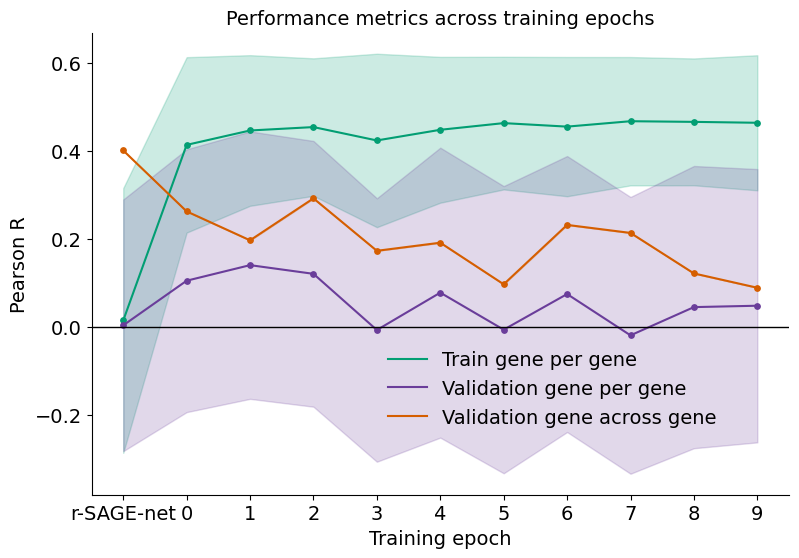

In [17]:
plt.figure(figsize=(9, 6))
fontsize=14

x = range(0, top_train_gene_gene_corrs.shape[0])
top_train_gene_gene_corrs_median = np.nanmedian(top_train_gene_gene_corrs, axis=1) 
top_val_gene_gene_corrs_median = np.nanmedian(top_val_gene_gene_corrs, axis=1)  
top_val_gene_sample_corrs_median = np.nanmedian(top_val_gene_sample_corrs, axis=1)  
top_train_gene_gene_corrs_std = np.nanstd(top_train_gene_gene_corrs, axis=1) 
top_val_gene_gene_corrs_std = np.nanstd(top_val_gene_gene_corrs, axis=1) 
top_val_gene_sample_corrs_std = np.nanstd(top_val_gene_sample_corrs, axis=1) 

plt.fill_between(x, top_train_gene_gene_corrs_median - top_train_gene_gene_corrs_std,
                 top_train_gene_gene_corrs_median + top_train_gene_gene_corrs_std,
                 color="#029E73", alpha=0.2)
plt.fill_between(x, top_val_gene_gene_corrs_median - top_val_gene_gene_corrs_std,
                 top_val_gene_gene_corrs_median + top_val_gene_gene_corrs_std,
                 color="#6A3D9A", alpha=0.2)
plt.fill_between(x, top_val_gene_sample_corrs_median - top_val_gene_sample_corrs_std,
                 top_val_gene_sample_corrs_median + top_val_gene_sample_corrs_std,
                 color="#D55E00", alpha=0.2)

plt.plot(x, top_train_gene_gene_corrs_median, label='Train gene per gene', color="#029E73")
plt.plot(x, top_val_gene_gene_corrs_median, label='Validation gene per gene', color="#6A3D9A")
plt.plot(x, top_val_gene_sample_corrs_median, label='Validation gene across gene', color="#D55E00")

plt.scatter(x, top_train_gene_gene_corrs_median, color="#029E73", zorder=1,s=15)
plt.scatter(x, top_val_gene_gene_corrs_median, color="#6A3D9A", zorder=1,s=15)
plt.scatter(x, top_val_gene_sample_corrs_median, color="#D55E00", zorder=1,s=15)

plt.axhline(y=0, color='black', linewidth=1)
plt.legend(fontsize=fontsize, bbox_to_anchor=(.4, .35), frameon=False)

xlablels = ['r-SAGE-net'] + list(range(10))
plt.xticks(ticks=x, labels=xlablels, fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('Training epoch', fontsize=fontsize)
plt.ylabel('Pearson R', fontsize=fontsize)
plt.title('Performance metrics across training epochs', fontsize=fontsize)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#### vary MAF

selecting train/val/test gene sets based on chromosome split
selecting train/val/test gene sets based on chromosome split


<Figure size 640x480 with 0 Axes>

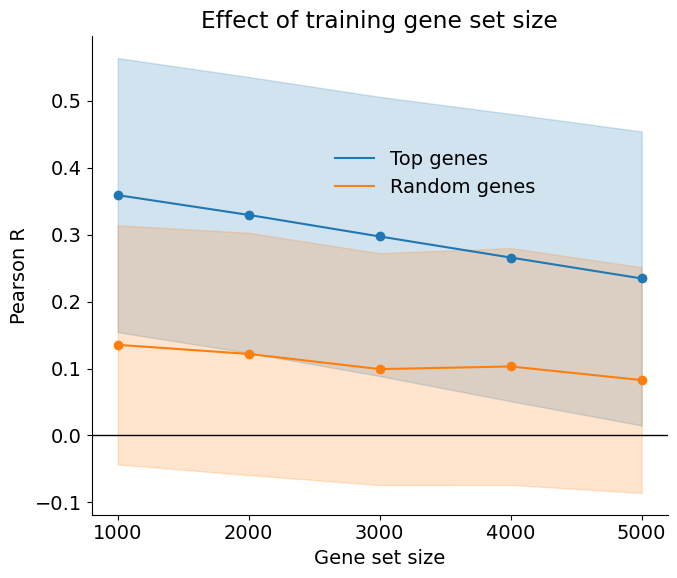

<Figure size 640x480 with 0 Axes>

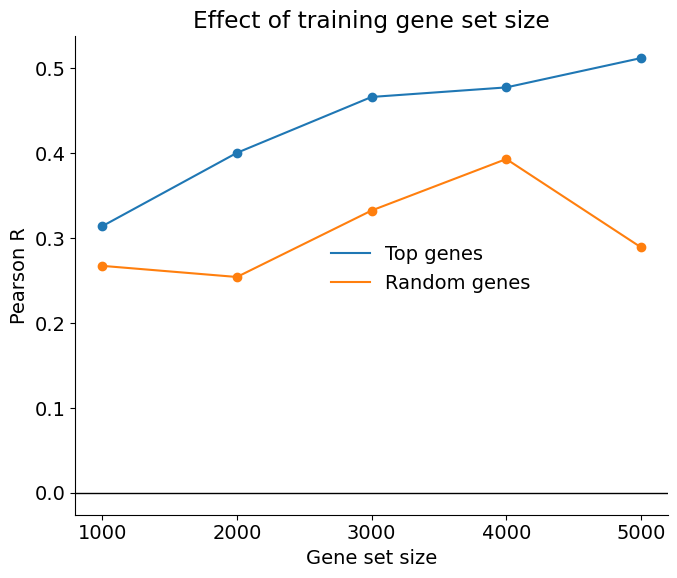

In [27]:
# train gene per gene 
top_base_path ='/data/mostafavilab/personal_genome_expr/da_models/larger_gene_sets_save_all_epochs/'
top_job_ids = [22527202,22527203,22527204,22527205,22527206]
top_epochs = [8,9,6,6,5]
top_paths = []
for i in range(len(top_job_ids)): 
    top_paths.append(f'{top_base_path}{top_job_ids[i]}/metric_train_gene_gene/eval_on_individual/gtex/test_subs/epoch={top_epochs[i]}.ckpt/')
top_gene_list = np.load(f'{top_paths[0]}gene_list.npy')
top_train, top_val, top_test = SAGEnet.tools.get_train_val_test_genes(top_gene_list)

# get paths (rand) 
rand_base_path ='/data/mostafavilab/personal_genome_expr/da_models/rand_larger_gene_sets_save_all_epochs/'
rand_job_ids = [22528725,22528726,22528727,22528728,22528729]
rand_epochs = [6,9,8,9,6]
rand_paths = []
for i in range(len(rand_job_ids)): 
    rand_paths.append(f'{rand_base_path}{rand_job_ids[i]}/metric_train_gene_gene/eval_on_individual/gtex/test_subs/epoch={rand_epochs[i]}.ckpt/')
rand_gene_list = np.load(f'{rand_paths[0]}gene_list.npy')
rand_train, rand_val, rand_test = SAGEnet.tools.get_train_val_test_genes(rand_gene_list)

top_gene_res = []
for path in top_paths: 
    top_gene_res.append(pd.read_csv(f'{path}per_gene_pearson_corr.csv',index_col=0).loc[top_train]['pearson'].values)
top_gene_res=np.array(top_gene_res)

rand_gene_res = []
for path in rand_paths: 
    rand_gene_res.append(pd.read_csv(f'{path}per_gene_pearson_corr.csv',index_col=0).loc[rand_train]['pearson'].values)
rand_gene_res=np.array(rand_gene_res)

SAGEnet.plot.line_plot_compare(top_gene_res,[1000,2000,3000,4000,5000],rand_gene_res,arra_t='Top genes',arrb_t='Random genes',xlabel='Gene set size',ylabel='Pearson R',fig_width=7,legend_x=.8,legend_y=.8,title='Effect of training gene set size')

top_gene_res = []
obs = gtex_expr_data.loc[top_test].mean(axis=1).values
for i in range(len(top_paths)): 
    path = top_paths[i]
    mean_pred = pd.read_csv(f'{path}mean_predictions.csv',index_col=0).loc[top_test].mean(axis=1).values
    corr, pval = scipy.stats.pearsonr(mean_pred,obs)
    top_gene_res.append(corr)
top_gene_res=np.array(top_gene_res)
    
rand_gene_res = []
obs = gtex_expr_data.loc[rand_test].mean(axis=1).values
for i in range(len(rand_paths)): 
    path = rand_paths[i]
    mean_pred = pd.read_csv(f'{path}mean_predictions.csv',index_col=0).loc[rand_test].mean(axis=1).values
    corr, pval = scipy.stats.pearsonr(mean_pred,obs)
    rand_gene_res.append(corr)
rand_gene_res=np.array(rand_gene_res)

SAGEnet.plot.line_plot_compare(top_gene_res,[1000,2000,3000,4000,5000],rand_gene_res,arra_t='Top genes',arrb_t='Random genes',xlabel='Gene set size',ylabel='Pearson R',fig_width=7,legend_x=.6,legend_y=.6,title='Effect of training gene set size')

#### n training individuals 

selecting train/val/test gene sets based on chromosome split
selecting train/val/test gene sets based on chromosome split


<Figure size 640x480 with 0 Axes>

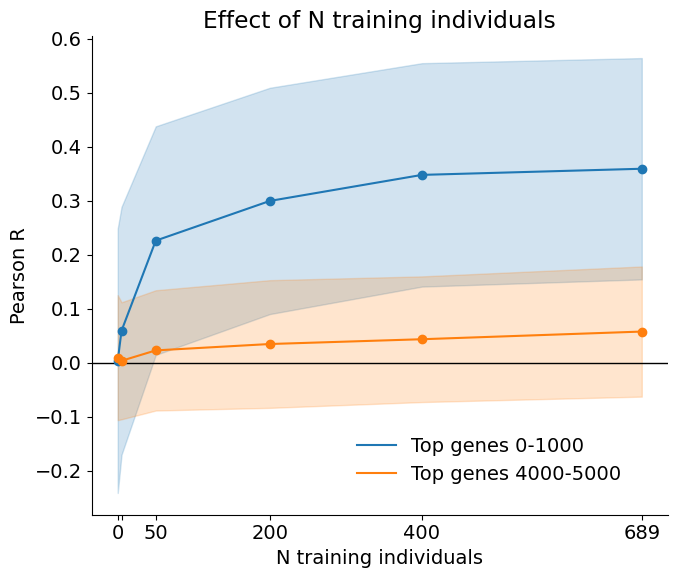

<Figure size 640x480 with 0 Axes>

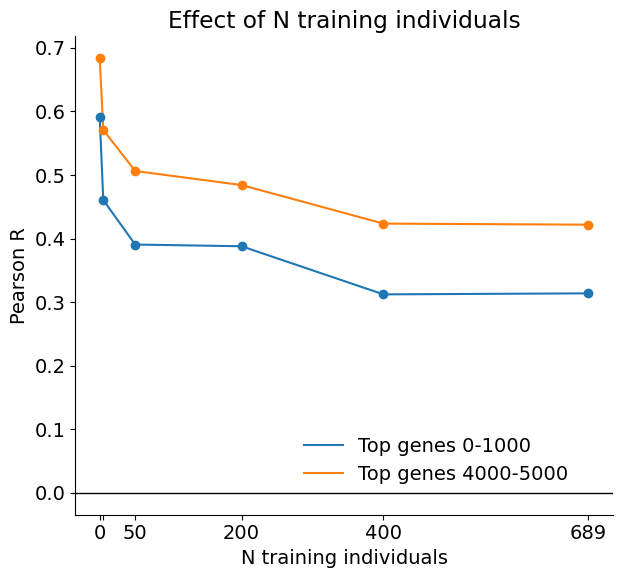

In [29]:
top_paths = [
'/data/mostafavilab/personal_genome_expr/ref_cnn_models/batch_norm/21890795/eval_on_individual/gtex/test/',
'/data/mostafavilab/personal_genome_expr/da_models/num_training_subs_save_all_epochs/22527971/metric_train_gene_gene/eval_on_individual/gtex/test_subs/epoch=4.ckpt/',
'/data/mostafavilab/personal_genome_expr/da_models/num_training_subs_save_all_epochs/22527973/metric_train_gene_gene/eval_on_individual/gtex/test_subs/epoch=9.ckpt/',
'/data/mostafavilab/personal_genome_expr/da_models/num_training_subs_save_all_epochs/22527975/metric_train_gene_gene/eval_on_individual/gtex/test_subs/epoch=7.ckpt/',
'/data/mostafavilab/personal_genome_expr/da_models/num_training_subs_save_all_epochs/22527978/metric_train_gene_gene/eval_on_individual/gtex/test_subs/epoch=9.ckpt/',
'/data/mostafavilab/personal_genome_expr/da_models/larger_gene_sets_save_all_epochs_22527202/metric_train_gene_gene/eval_on_individual/gtex/test_subs/epoch=8.ckpt/']

harder_paths = [
'/data/mostafavilab/personal_genome_expr/ref_cnn_models/rc_neg_strand/job0/metric_train_gene_gene/eval_on_individual/snps_and_indels/no_maf_filter/gtex/test_subs/epoch=12-step=32045.ckpt/',
'/data/mostafavilab/personal_genome_expr/da_models/harder_num_training_subs_save_all_epochs/22982304/metric_train_gene_gene/eval_on_individual/snps_and_indels/no_maf_filter/gtex/test_subs/epoch=5.ckpt/',
'/data/mostafavilab/personal_genome_expr/da_models/harder_num_training_subs_save_all_epochs/22982305/metric_train_gene_gene/eval_on_individual/snps_and_indels/no_maf_filter/gtex/test_subs/epoch=6.ckpt/',
'/data/mostafavilab/personal_genome_expr/da_models/harder_num_training_subs_save_all_epochs/22982306/metric_train_gene_gene/eval_on_individual/snps_and_indels/no_maf_filter/gtex/test_subs/epoch=8.ckpt/',
'/data/mostafavilab/personal_genome_expr/da_models/harder_num_training_subs_save_all_epochs/22982307/metric_train_gene_gene/eval_on_individual/snps_and_indels/no_maf_filter/gtex/test_subs/epoch=9.ckpt/',
'/data/mostafavilab/personal_genome_expr/da_models/harder_num_training_subs_save_all_epochs/23317290/metric_train_gene_gene/eval_on_individual/snps_and_indels/no_maf_filter/gtex/test_subs/epoch=9.ckpt/']

top_gene_list = np.load(f'{top_paths[1]}gene_list.npy')
harder_gene_list = np.load(f'{harder_paths[0]}gene_list.npy')
top_train, top_val, top_test = SAGEnet.tools.get_train_val_test_genes(top_gene_list)
harder_train, harder_val, harder_test = SAGEnet.tools.get_train_val_test_genes(harder_gene_list)

x = [0, 5, 50, 200, 400, 689] 
xlabels = [0,'',50, 200, 400, 689] 

# train gene per gene
top_gene_res = []
for path in top_paths: 
    top_gene_res.append(pd.read_csv(f'{path}per_gene_pearson_corr.csv',index_col=0).loc[top_train]['pearson'].values)
top_gene_res=np.array(top_gene_res)

harder_gene_res = []
for path in harder_paths: 
    harder_gene_res.append(pd.read_csv(f'{path}per_gene_pearson_corr.csv',index_col=0).loc[harder_train]['pearson'].values)
harder_gene_res=np.array(harder_gene_res)

SAGEnet.plot.line_plot_compare(top_gene_res,xlabels,harder_gene_res,x=x,arra_t='Top genes 0-1000',arrb_t='Top genes 4000-5000',xlabel='N training individuals',ylabel='Pearson R',fig_width=7,legend_x=.95,legend_y=.2, title='Effect of N training individuals')

# test gene across gene 
top_gene_res = []
obs = gtex_expr_data.loc[top_test].mean(axis=1).values
for i in range(len(top_paths)): 
    path = top_paths[i]
    if i==0: 
        mean_pred = pd.read_csv(f'{path}predictions.csv',index_col=0).loc[top_test].mean(axis=1).values
    else: 
        mean_pred = pd.read_csv(f'{path}mean_predictions.csv',index_col=0).loc[top_test].mean(axis=1).values
    corr, pval = scipy.stats.pearsonr(mean_pred,obs)
    top_gene_res.append(corr)
top_gene_res=np.array(top_gene_res)
    
harder_gene_res = []
obs = gtex_expr_data.loc[harder_test].mean(axis=1).values
for i in range(len(harder_paths)): 
    path = harder_paths[i]
    if i==0: 
        mean_pred = pd.read_csv(f'{path}predictions.csv',index_col=0).loc[harder_test].mean(axis=1).values
    else: 
        mean_pred = pd.read_csv(f'{path}mean_predictions.csv',index_col=0).loc[harder_test].mean(axis=1).values
    corr, pval = scipy.stats.pearsonr(mean_pred,obs)
    harder_gene_res.append(corr)
harder_gene_res=np.array(harder_gene_res)
    
SAGEnet.plot.line_plot_compare(top_gene_res,xlabels,harder_gene_res,x=x,arra_t='Top genes 0-1000',arrb_t='Top genes 4000-5000',xlabel='N training individuals',ylabel='Pearson R',fig_width=9,legend_x=.95,legend_y=.2, title='Effect of N training individuals')

#### train gene set size

selecting train/val/test gene sets based on chromosome split
selecting train/val/test gene sets based on chromosome split


<Figure size 640x480 with 0 Axes>

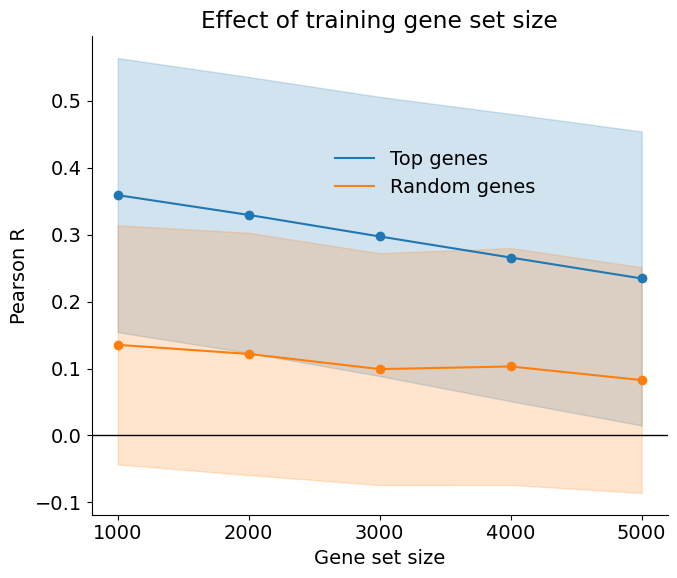

<Figure size 640x480 with 0 Axes>

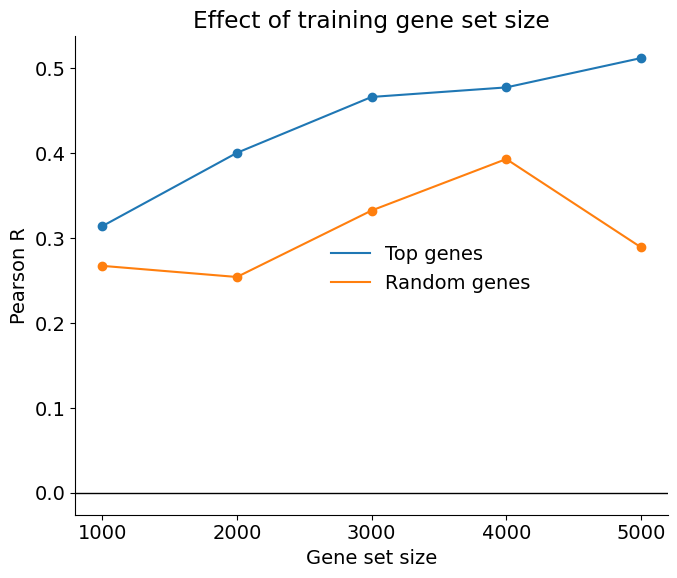

In [32]:
# train gene per gene 
top_base_path ='/data/mostafavilab/personal_genome_expr/da_models/larger_gene_sets_save_all_epochs/'
top_job_ids = [22527202,22527203,22527204,22527205,22527206]
top_epochs = [8,9,6,6,5]
top_paths = []
for i in range(len(top_job_ids)): 
    top_paths.append(f'{top_base_path}{top_job_ids[i]}/metric_train_gene_gene/eval_on_individual/gtex/test_subs/epoch={top_epochs[i]}.ckpt/')
top_gene_list = np.load(f'{top_paths[0]}gene_list.npy')
top_train, top_val, top_test = SAGEnet.tools.get_train_val_test_genes(top_gene_list)

# get paths (rand) 
rand_base_path ='/data/mostafavilab/personal_genome_expr/da_models/rand_larger_gene_sets_save_all_epochs/'
rand_job_ids = [22528725,22528726,22528727,22528728,22528729]
rand_epochs = [6,9,8,9,6]
rand_paths = []
for i in range(len(rand_job_ids)): 
    rand_paths.append(f'{rand_base_path}{rand_job_ids[i]}/metric_train_gene_gene/eval_on_individual/gtex/test_subs/epoch={rand_epochs[i]}.ckpt/')
rand_gene_list = np.load(f'{rand_paths[0]}gene_list.npy')
rand_train, rand_val, rand_test = SAGEnet.tools.get_train_val_test_genes(rand_gene_list)

top_gene_res = []
for path in top_paths: 
    top_gene_res.append(pd.read_csv(f'{path}per_gene_pearson_corr.csv',index_col=0).loc[top_train]['pearson'].values)
top_gene_res=np.array(top_gene_res)

rand_gene_res = []
for path in rand_paths: 
    rand_gene_res.append(pd.read_csv(f'{path}per_gene_pearson_corr.csv',index_col=0).loc[rand_train]['pearson'].values)
rand_gene_res=np.array(rand_gene_res)

SAGEnet.plot.line_plot_compare(top_gene_res,[1000,2000,3000,4000,5000],rand_gene_res,arra_t='Top genes',arrb_t='Random genes',xlabel='Gene set size',ylabel='Pearson R',fig_width=7,legend_x=.8,legend_y=.8,title='Effect of training gene set size')

top_gene_res = []
obs = gtex_expr_data.loc[top_test].mean(axis=1).values
for i in range(len(top_paths)): 
    path = top_paths[i]
    mean_pred = pd.read_csv(f'{path}mean_predictions.csv',index_col=0).loc[top_test].mean(axis=1).values
    corr, pval = scipy.stats.pearsonr(mean_pred,obs)
    top_gene_res.append(corr)
top_gene_res=np.array(top_gene_res)
    
rand_gene_res = []
obs = gtex_expr_data.loc[rand_test].mean(axis=1).values
for i in range(len(rand_paths)): 
    path = rand_paths[i]
    mean_pred = pd.read_csv(f'{path}mean_predictions.csv',index_col=0).loc[rand_test].mean(axis=1).values
    corr, pval = scipy.stats.pearsonr(mean_pred,obs)
    rand_gene_res.append(corr)
rand_gene_res=np.array(rand_gene_res)

SAGEnet.plot.line_plot_compare(top_gene_res,[1000,2000,3000,4000,5000],rand_gene_res,arra_t='Top genes',arrb_t='Random genes',xlabel='Gene set size',ylabel='Pearson R',fig_width=7,legend_x=.6,legend_y=.6,title='Effect of training gene set size')

#### only SNVs vs. all variants 

selecting regions from 0 to 1000
selecting train/val/test gene sets based on chromosome split
selecting train/val/test gene sets based on chromosome split
selecting regions from 4000 to 5000
selecting train/val/test gene sets based on chromosome split
selecting train/val/test gene sets based on chromosome split


/homes/gws/aspiro17/SAGEnet/SAGEnet/plot.py:203: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x=x_col, y=y_col, data=plot_df, whis=np.inf, width=0.8,


<Axes: xlabel='Gene and variant set', ylabel='Pearson R'>

<Figure size 640x480 with 0 Axes>

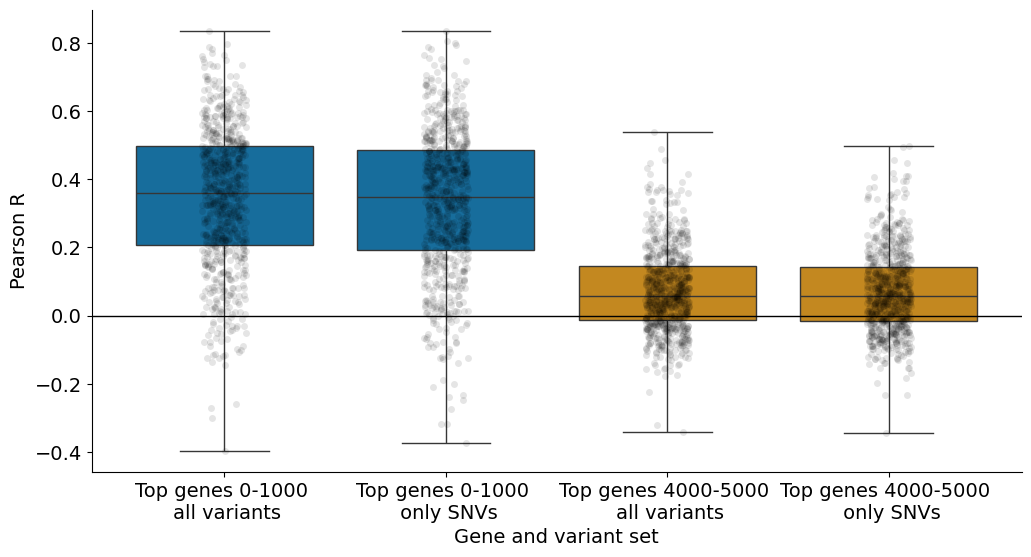

In [31]:
predixcan_res_path='/homes/gws/aspiro17/seqtoexp/PersonalGenomeExpression-dev/results_data/predixcan/rosmap_pearson_corr.csv'

all_top_1000_gene_set = SAGEnet.tools.select_region_set(predixcan_res_path, rand_regions=0,num_regions=1000,region_idx_start=0) 
all_top_1000_train, all_top_1000_val , all_top_1000_test = SAGEnet.tools.get_train_val_test_genes(all_top_1000_gene_set)

top_1000_gene_set=np.array([gene for gene in all_top_1000_gene_set if gene in gtex_expr_data.index])
top_1000_train, top_1000_val , top_1000_test = SAGEnet.tools.get_train_val_test_genes(top_1000_gene_set)

all_harder_1000_gene_set = SAGEnet.tools.select_region_set(predixcan_res_path, rand_regions=0,num_regions=1000,region_idx_start=4000) 
all_harder_1000_train, all_harder_1000_val , all_harder_1000_test = SAGEnet.tools.get_train_val_test_genes(all_harder_1000_gene_set)

harder_1000_gene_set=np.array([gene for gene in all_harder_1000_gene_set if gene in gtex_expr_data.index])
harder_1000_train, harder_1000_val , harder_1000_test = SAGEnet.tools.get_train_val_test_genes(harder_1000_gene_set)

top_paths = ['/data/mostafavilab/personal_genome_expr/da_models/larger_gene_sets_save_all_epochs_22527202/metric_train_gene_gene/eval_on_individual/gtex/test_subs/epoch=8.ckpt/',
         '/data/mostafavilab/personal_genome_expr/da_models/larger_gene_sets_save_all_epochs_22527202/metric_train_gene_gene/eval_on_individual/only_snps/eval_on_individual/gtex/test_subs/epoch=8.ckpt/',
         ]

harder_paths = ['/data/mostafavilab/personal_genome_expr/da_models/harder_num_training_subs_save_all_epochs/23317290/metric_train_gene_gene/eval_on_individual/snps_and_indels/no_maf_filter/gtex/test_subs/epoch=9.ckpt/',
         '/data/mostafavilab/personal_genome_expr/da_models/harder_num_training_subs_save_all_epochs/23317290/psagenet_model/metric_train_gene_gene/eval_on_individual/only_snps/no_maf_filter/gtex/test_subs/epoch=9.ckpt/',
         ]

top_all = pd.read_csv(f'{top_paths[0]}per_gene_pearson_corr.csv',index_col=0).loc[top_1000_train]
top_snps = pd.read_csv(f'{top_paths[1]}per_gene_pearson_corr.csv',index_col=0).loc[top_1000_train]

harder_all = pd.read_csv(f'{harder_paths[0]}per_gene_pearson_corr.csv',index_col=0).loc[harder_1000_train]
harder_snps = pd.read_csv(f'{harder_paths[1]}per_gene_pearson_corr.csv',index_col=0).loc[harder_1000_train]

custom_palette = {
    f'Top genes 0-1000 \n all variants': sb.color_palette('colorblind')[0],
    f'Top genes 0-1000 \n only SNVs': sb.color_palette('colorblind')[0],
    f'Top genes 4000-5000 \n all variants': sb.color_palette('colorblind')[1],
    f'Top genes 4000-5000 \n only SNVs': sb.color_palette('colorblind')[1]}

plot_data = pd.DataFrame({
    'Pearson R': pd.concat([
        top_all['pearson'],
        top_snps['pearson'],
        harder_all['pearson'],
        harder_snps['pearson']
    ]),
    'Group': (['Top genes 0-1000 \n all variants'] * len(top_all)) +
             (['Top genes 0-1000 \n only SNVs'] * len(top_snps)) +
             (['Top genes 4000-5000 \n all variants'] * len(harder_all)) +
             (['Top genes 4000-5000 \n only SNVs'] * len(harder_snps))
})


SAGEnet.plot.sb_plot(plot_data,custom_palette=custom_palette,fig_width=12,xlabel = 'Gene and variant set', ylabel='Pearson R',long_format=True,fontsize=14)

#### performance on ref seq 

In [4]:
assignments_df = pd.read_csv('/homes/gws/aspiro17/seqtoexp/PersonalGenomeExpression-dev/input_data/enformer_gene_splits.csv',index_col=0)
enformer_train_genes = assignments_df[assignments_df['enformer_set']=='train'].index
enformer_val_genes = assignments_df[assignments_df['enformer_set']=='valid'].index
enformer_test_genes = assignments_df[assignments_df['enformer_set']=='test'].index

In [5]:
fintuned_ref_pred_df = pd.read_csv('/data/mostafavilab/personal_genome_expr/final_results/enformer/ref_seq_all_tracks/finetuned_ref_pred.csv',index_col=0)
track_specific_ref_pred_df= pd.read_csv('/data/mostafavilab/personal_genome_expr/final_results/enformer/ref_seq_all_tracks/track_specific_ref_pred.csv',index_col=0)

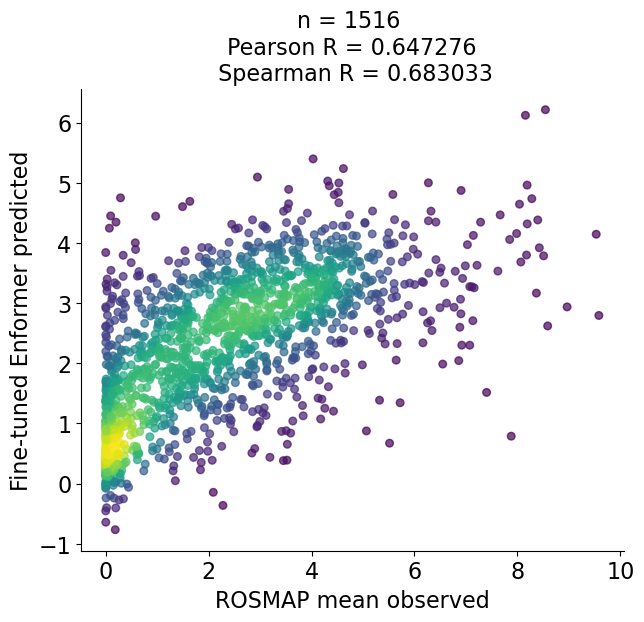

In [7]:
SAGEnet.plot.scatter_compare(rosmap_expr_data.loc[enformer_test_genes].mean(axis=1).values,fintuned_ref_pred_df.loc[enformer_test_genes]['pred'].values,'ROSMAP mean observed','Fine-tuned Enformer predicted',save_dir=fig_save_dir,save_name='fig_s1b',fig_width=7)

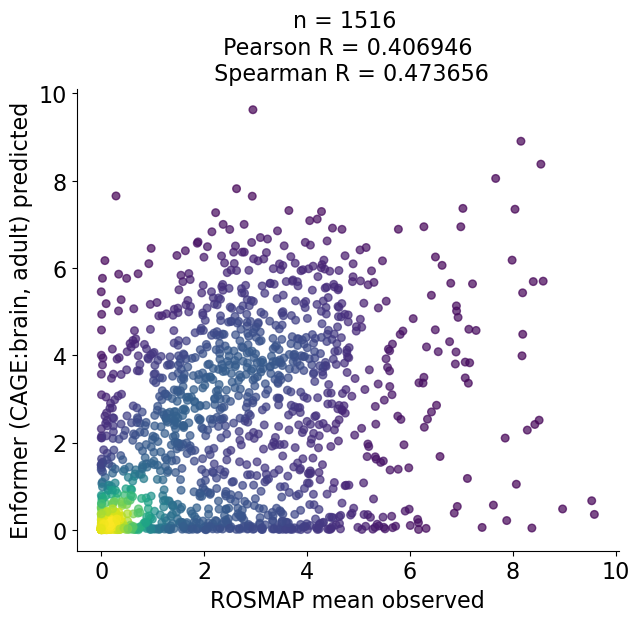

In [9]:
SAGEnet.plot.scatter_compare(rosmap_expr_data.loc[enformer_test_genes].mean(axis=1).values,track_specific_ref_pred_df.loc[enformer_test_genes]['pred'].values,'ROSMAP mean observed','Enformer (CAGE:brain, adult) predicted',save_dir=fig_save_dir,save_name='fig_s1c',fig_width=7)

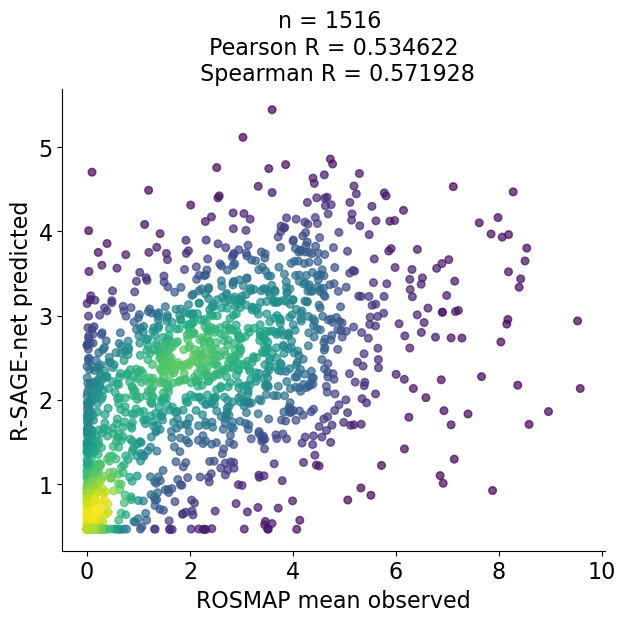

In [10]:
# r-SAGE-net
refcnn_pred_dir = '/data/mostafavilab/personal_genome_expr/ref_cnn_models/rc_neg_strand_enformer_gene_set/job0/metric_train_gene_gene/eval_on_ref_seq/epoch=13-step=35784.ckpt/'
refcnn_gene_list = np.load(f'{refcnn_pred_dir}gene_list.npy')
refcnn_pred = np.load(f'{refcnn_pred_dir}preds.npy')
refcnn_pred_res= pd.DataFrame(index=refcnn_gene_list)
refcnn_pred_res['pred'] = refcnn_pred
SAGEnet.plot.scatter_compare(rosmap_expr_data.loc[enformer_test_genes].mean(axis=1).values,refcnn_pred_res.loc[enformer_test_genes]['pred'].values,'ROSMAP mean observed','R-SAGE-net predicted',save_dir=fig_save_dir,save_name='fig_s1a',fig_width=7)

#### model variations

##### ablation 

/tmp/ipykernel_3657574/3519113207.py:85: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p = scipy.stats.pearsonr(obs,pred[:,1])
/tmp/ipykernel_3657574/3519113207.py:85: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p = scipy.stats.pearsonr(obs,pred[:,1])
/tmp/ipykernel_3657574/3519113207.py:85: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p = scipy.stats.pearsonr(obs,pred[:,1])
/tmp/ipykernel_3657574/3519113207.py:85: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p = scipy.stats.pearsonr(obs,pred[:,1])
/tmp/ipykernel_3657574/3519113207.py:91: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p = scipy.stats.pearsonr(obs,pred)


selecting train/val/test gene sets based on chromosome split


/homes/gws/aspiro17/SAGEnet/SAGEnet/plot.py:231: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.stripplot(data=non_na_plot_df, color='black',


<Figure size 640x480 with 0 Axes>

<Figure size 1100x600 with 0 Axes>

<Figure size 1100x600 with 0 Axes>

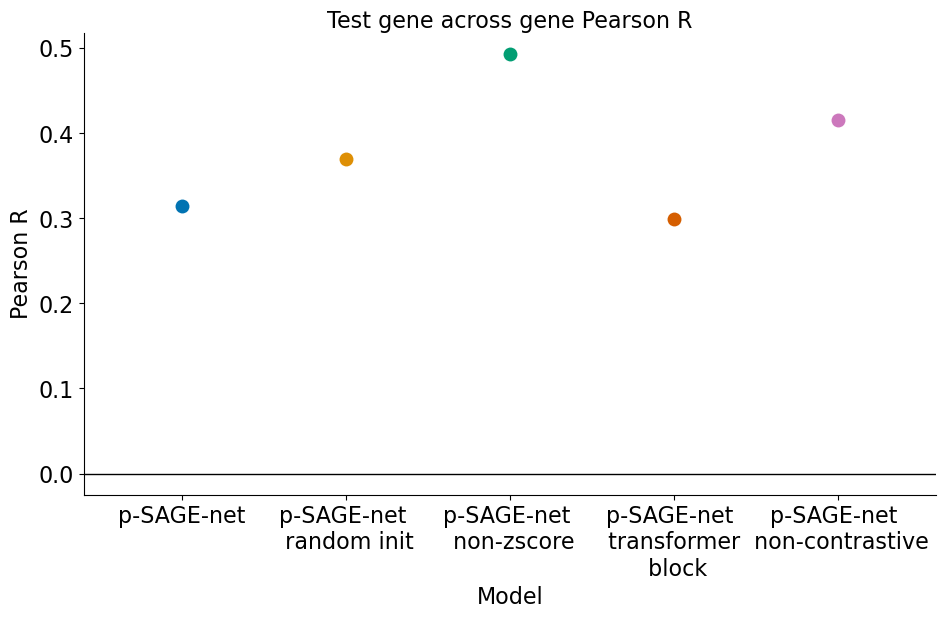

In [40]:
# ablation 
paths = ['/data/mostafavilab/personal_genome_expr/da_models/larger_gene_sets_save_all_epochs_22527202/metric_train_gene_gene/eval_on_individual/gtex/test_subs/epoch=8.ckpt/',
        '/data/mostafavilab/personal_genome_expr/da_models/no_start_from_ref_save_all_epochs_22527758/metric_train_gene_gene/eval_on_individual/gtex/test_subs/epoch=8.ckpt/',
         '/data/mostafavilab/personal_genome_expr/da_models/not_zscore_save_all_epochs_22527397/metric_train_gene_gene/eval_on_individual/gtex/test_subs/epoch=8.ckpt/',
         '/data/mostafavilab/personal_genome_expr/da_models/transformer/23290707/metric_train_gene_gene/eval_on_individual/snps_and_indels/no_maf_filter/gtex/test_subs/epoch=8.ckpt/',
        '/data/mostafavilab/personal_genome_expr/da_models/no_expr_split_no_subtract_23941856/metric_train_gene_gene/eval_on_individual/snps_and_indels/no_maf_filter/gtex/test_subs/epoch=7.ckpt/'
        ]

labels = ['p-SAGE-net','p-SAGE-net \n random init','p-SAGE-net \n non-zscore','p-SAGE-net \n transformer \n block', 'p-SAGE-net \n non-contrastive']
fig_save_dir = '/homes/gws/aspiro17/SAGEnet-revisions/plot_figs/figs/'
save_boxplots(paths,labels,gtex_expr_data,'ablation',fig_save_dir=fig_save_dir,fig_width=11,fontsize=14,non_dual_output=[paths[4]])

##### hyperparamter weights 

/tmp/ipykernel_3657574/3519113207.py:85: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p = scipy.stats.pearsonr(obs,pred[:,1])
/tmp/ipykernel_3657574/3519113207.py:85: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p = scipy.stats.pearsonr(obs,pred[:,1])
/tmp/ipykernel_3657574/3519113207.py:85: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p = scipy.stats.pearsonr(obs,pred[:,1])


selecting train/val/test gene sets based on chromosome split


/homes/gws/aspiro17/SAGEnet/SAGEnet/plot.py:231: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.stripplot(data=non_na_plot_df, color='black',


<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

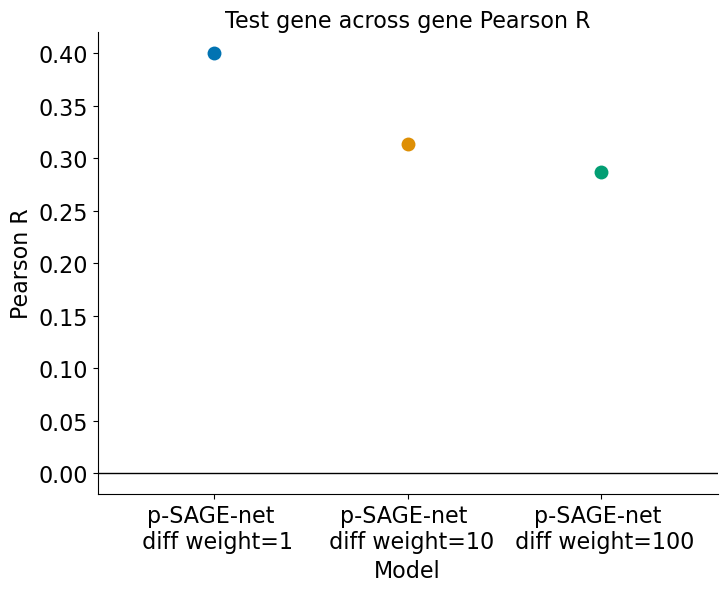

In [41]:
paths = ['/data/mostafavilab/personal_genome_expr/da_models/test_weights_save_all_epochs/22528530/metric_train_gene_gene/eval_on_individual/gtex/test_subs/epoch=8.ckpt/',
        '/data/mostafavilab/personal_genome_expr/da_models/larger_gene_sets_save_all_epochs_22527202/metric_train_gene_gene/eval_on_individual/gtex/test_subs/epoch=8.ckpt/',
         '/data/mostafavilab/personal_genome_expr/da_models/test_weights_save_all_epochs/22528533/metric_train_gene_gene/eval_on_individual/gtex/test_subs/epoch=8.ckpt/',]
labels = ['p-SAGE-net \n diff weight=1','p-SAGE-net \n diff weight=10','p-SAGE-net \n diff weight=100']
save_boxplots(paths,labels,gtex_expr_data,fig_save_dir=fig_save_dir,title='GTEx',fig_width=8,experiment_label='fig_s7_be')

##### window size

/tmp/ipykernel_3657574/3519113207.py:85: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p = scipy.stats.pearsonr(obs,pred[:,1])
/tmp/ipykernel_3657574/3519113207.py:85: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p = scipy.stats.pearsonr(obs,pred[:,1])
/tmp/ipykernel_3657574/3519113207.py:85: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p = scipy.stats.pearsonr(obs,pred[:,1])
/tmp/ipykernel_3657574/3519113207.py:85: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p = scipy.stats.pearsonr(obs,pred[:,1])
/tmp/ipykernel_3657574/3519113207.py:85: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p = scipy.stats.pearsonr(obs,pred[:,1])
/tmp/ipykernel_3657574/3519113207.py:85: ConstantInputWarning: An input array is cons

selecting train/val/test gene sets based on chromosome split


/homes/gws/aspiro17/SAGEnet/SAGEnet/plot.py:231: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.stripplot(data=non_na_plot_df, color='black',


<Figure size 640x480 with 0 Axes>

<Figure size 500x600 with 0 Axes>

<Figure size 500x600 with 0 Axes>

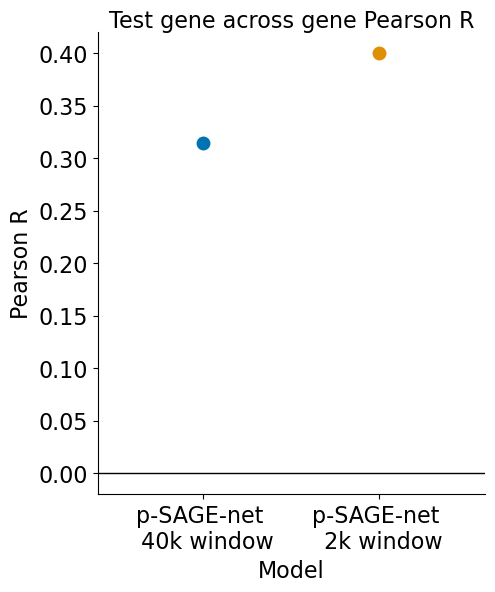

In [43]:
paths = ['/data/mostafavilab/personal_genome_expr/da_models/larger_gene_sets_save_all_epochs_22527202/metric_train_gene_gene/eval_on_individual/gtex/test_subs/epoch=8.ckpt/',
         '/data/mostafavilab/personal_genome_expr/da_models/1k_input_2k_no_rc_fix_err_23149453/metric_train_gene_gene/eval_on_individual/snps_and_indels/no_maf_filter/gtex/test_subs/epoch=5.ckpt/',
         ]

labels = ['p-SAGE-net \n 40k window','p-SAGE-net \n 2k window']
fig_save_dir = '/homes/gws/aspiro17/SAGEnet-revisions/plot_figs/figs/'
save_boxplots(paths,labels,gtex_expr_data,'win_size',fig_save_dir=fig_save_dir,fig_width=5,fontsize=14)

##### increased model size

/tmp/ipykernel_3657574/3519113207.py:85: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p = scipy.stats.pearsonr(obs,pred[:,1])
/tmp/ipykernel_3657574/3519113207.py:85: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p = scipy.stats.pearsonr(obs,pred[:,1])
/tmp/ipykernel_3657574/3519113207.py:85: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p = scipy.stats.pearsonr(obs,pred[:,1])
/tmp/ipykernel_3657574/3519113207.py:85: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p = scipy.stats.pearsonr(obs,pred[:,1])
/tmp/ipykernel_3657574/3519113207.py:85: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p = scipy.stats.pearsonr(obs,pred[:,1])
/tmp/ipykernel_3657574/3519113207.py:85: ConstantInputWarning: An input array is cons

selecting train/val/test gene sets based on chromosome split


/homes/gws/aspiro17/SAGEnet/SAGEnet/plot.py:231: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.stripplot(data=non_na_plot_df, color='black',


<Figure size 640x480 with 0 Axes>

<Figure size 500x600 with 0 Axes>

<Figure size 500x600 with 0 Axes>

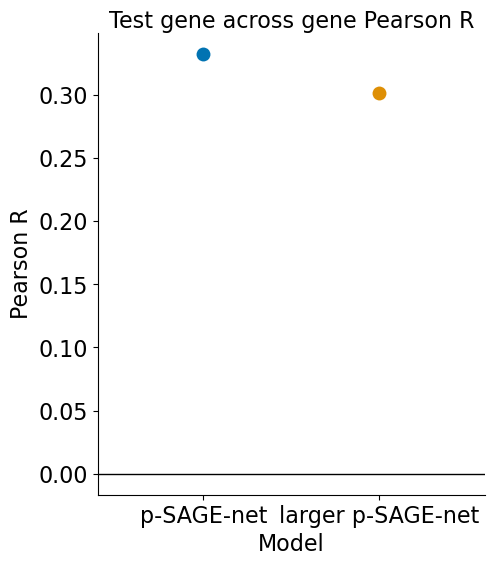

In [44]:
smaller_model_path = '/data/mostafavilab/personal_genome_expr/da_models/rand_larger_gene_sets_save_all_epochs/22528727/metric_train_gene_gene/eval_on_individual/gtex/test_subs/epoch=8.ckpt/'
larger_model_path = '/data/mostafavilab/personal_genome_expr/da_models/med_model_3k_rand/23506873/personal_model/metric_train_gene_gene/eval_on_individual/snps_and_indels/no_maf_filter/gtex/test_subs/epoch=6.ckpt/'
fig_save_dir = '/homes/gws/aspiro17/seqtoexp/PersonalGenomeExpression-dev/plot_figures/figs/'
gene_set = np.load('/data/mostafavilab/personal_genome_expr/da_models/rand_larger_gene_sets_save_all_epochs/22528725/metric_train_gene_gene/eval_on_individual/gtex/test_subs/epoch=6.ckpt/gene_list.npy')
fig_save_dir = '/homes/gws/aspiro17/SAGEnet-revisions/plot_figs/figs/'
save_boxplots([smaller_model_path,larger_model_path],['p-SAGE-net', 'larger p-SAGE-net'],gtex_expr_data,'larger_model',fig_save_dir=fig_save_dir,title='',xlabel='Model',fig_width=5,gene_set=gene_set,fontsize=14)

##### rc vs. non

/tmp/ipykernel_3657574/3519113207.py:85: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p = scipy.stats.pearsonr(obs,pred[:,1])
/tmp/ipykernel_3657574/3519113207.py:85: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p = scipy.stats.pearsonr(obs,pred[:,1])


selecting train/val/test gene sets based on chromosome split


/homes/gws/aspiro17/SAGEnet/SAGEnet/plot.py:231: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.stripplot(data=non_na_plot_df, color='black',


<Figure size 640x480 with 0 Axes>

<Figure size 500x600 with 0 Axes>

<Figure size 500x600 with 0 Axes>

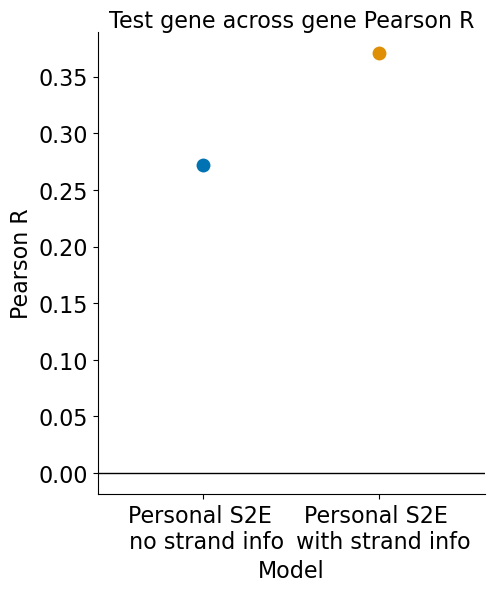

In [45]:
paths = ['/data/mostafavilab/personal_genome_expr/da_models/larger_gene_sets_save_all_epochs_22527202/metric_train_gene_gene/eval_on_individual/gtex/test_subs/epoch=22.ckpt/',
         '/data/mostafavilab/personal_genome_expr/da_models/1k_with_rc_22962405/metric_train_gene_gene/eval_on_individual/snps_and_indels/no_maf_filter/gtex/test_subs/epoch=17.ckpt/']

labels = ['Personal S2E \n no strand info','Personal S2E \n with strand info']
fig_save_dir = '/homes/gws/aspiro17/SAGEnet-revisions/plot_figs/figs/'
save_boxplots(paths,labels,gtex_expr_data,'strand_info',fig_save_dir=fig_save_dir,title='GTEx',fig_width=5,gene_set=top_1000_gene_set)

#### ENSG00000134202 performance

In [46]:
gene_of_interest = 'ENSG00000134202'
personal_model_diff_predictions = pd.read_csv('/data/mostafavilab/personal_genome_expr/da_models/larger_gene_sets_save_all_epochs_22527202/metric_train_gene_gene/eval_on_individual/gtex/test_subs/epoch=8.ckpt/diff_predictions.csv',index_col=0)
ref_model_predictions = pd.read_csv('/data/mostafavilab/personal_genome_expr/ref_cnn_models/rc_neg_strand/job0/metric_train_gene_gene/eval_on_individual/snps_and_indels/no_maf_filter/gtex/test_subs/epoch=12-step=32045.ckpt/predictions.csv',index_col=0)
enformer_pred = pd.read_csv('/data/mostafavilab/personal_genome_expr/final_results/enformer/finetuned_example/eval_on_individual/snps_and_indels/no_maf_filter/gtex/test_subs/predictions.csv',index_col=0)

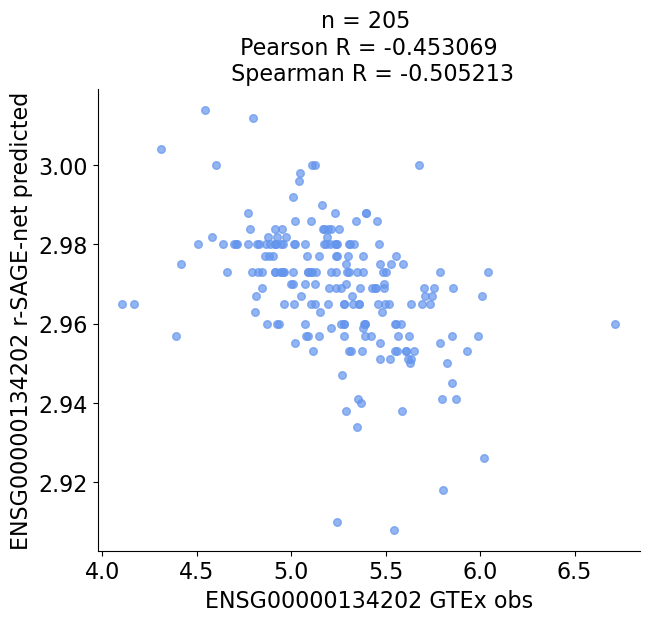

In [47]:
SAGEnet.plot.scatter_compare(gtex_expr_data.loc[gene_of_interest,gtex_expr_data.columns],ref_model_predictions.loc[gene_of_interest,gtex_expr_data.columns],plot_density=False,
                                arra_t=f'{gene_of_interest} GTEx obs',arrb_t=f'{gene_of_interest} r-SAGE-net predicted',fig_width=7)

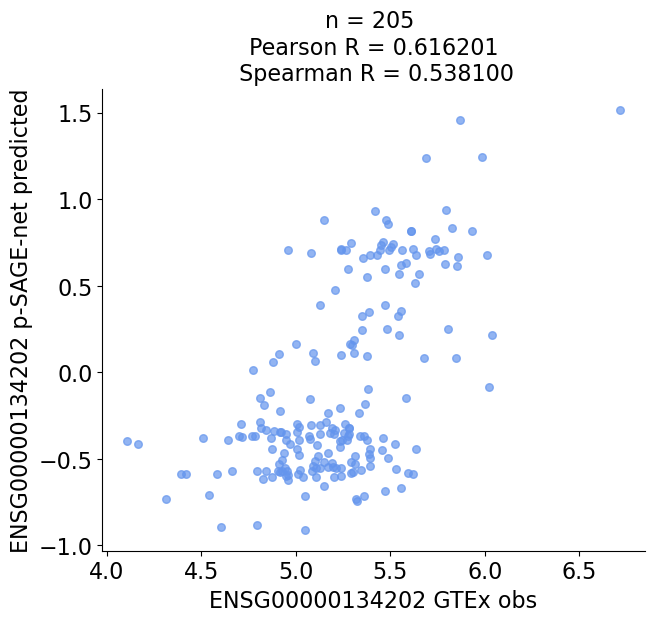

In [48]:
SAGEnet.plot.scatter_compare(gtex_expr_data.loc[gene_of_interest,gtex_expr_data.columns],personal_model_diff_predictions.loc[gene_of_interest,gtex_expr_data.columns],plot_density=False,
                                arra_t=f'{gene_of_interest} GTEx obs',arrb_t=f'{gene_of_interest} p-SAGE-net predicted',fig_width=7)

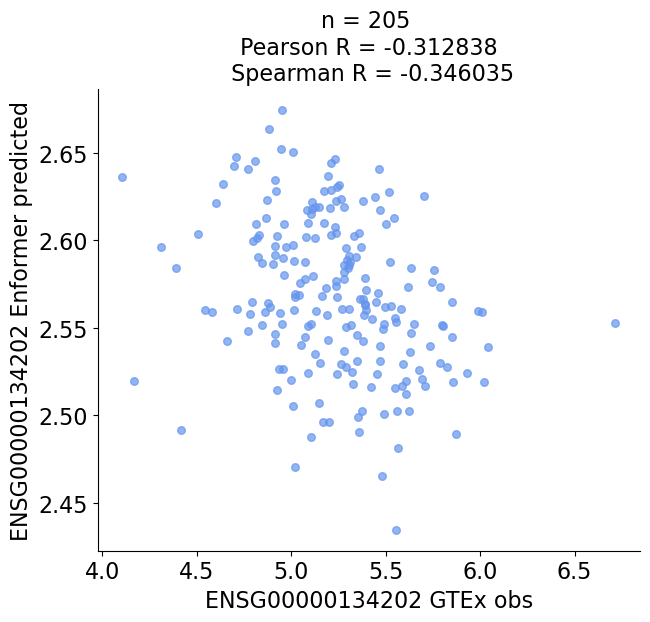

In [49]:
SAGEnet.plot.scatter_compare(gtex_expr_data.loc[gene_of_interest,gtex_expr_data.columns],enformer_pred.loc[gene_of_interest,gtex_expr_data.columns],plot_density=False,
                                arra_t=f'{gene_of_interest} GTEx obs',arrb_t=f'{gene_of_interest} Enformer predicted',fig_width=7)

#### DNAm

##### load DNAm data

In [2]:
rosmap_y_data_path='/data/aspiro17/DNAm_and_expression/data/ROSMAP_DNAm/methylationSNMnorm.csv'
rosmap_y_data= pd.read_csv(rosmap_y_data_path, index_col=0) # genes or probes x individuals

metadata_path='/data/aspiro17/DNAm_and_expression/data/ROSMAP_DNAm/dnam_meta_hg38_tab.csv'
metadata = pd.read_csv(metadata_path, sep='\t', index_col='region_id')

enet_path='/data/aspiro17/DNAm_and_expression/enet_res/dnam/summarized_res/rosmap/input_len_10000/maf_filter_0.01/pearson_corrs.csv'
enet_res=pd.read_csv(enet_path,index_col=0)
enet_res = enet_res.sort_values(by='val_pearson', ascending=False)

##### window size

<Axes: title={'center': 'PrediXcan per region Pearson R'}, xlabel='Input length', ylabel='Pearson R'>

<Figure size 640x480 with 0 Axes>

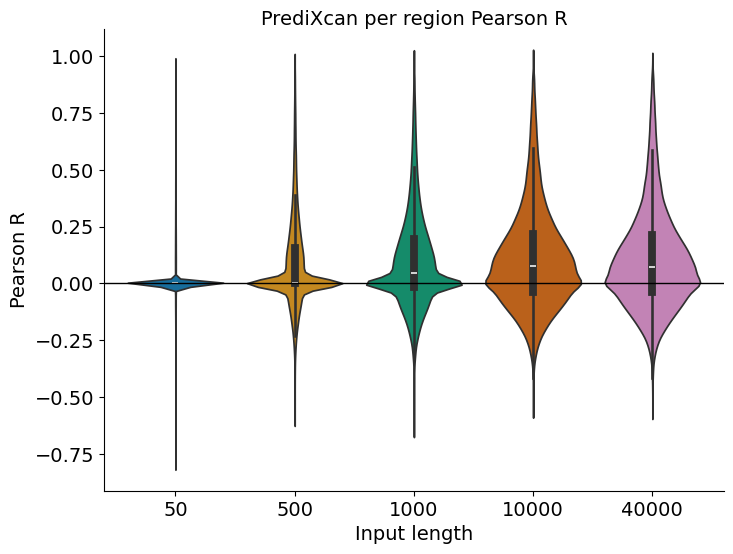

In [5]:
base_dir ='/data/aspiro17/DNAm_and_expression/enet_res/dnam/'
dataset='rosmap'
train_val_test_subs='test'
subs = SAGEnet.tools.get_subs('test')

input_len_50=pd.read_csv(f'{base_dir}summarized_res/{dataset}/input_len_50/maf_filter_0.01/pearson_corrs.csv',index_col=0)
input_len_500=pd.read_csv(f'{base_dir}summarized_res/{dataset}/input_len_500/maf_filter_0.01/pearson_corrs.csv',index_col=0)
input_len_1000=pd.read_csv(f'{base_dir}summarized_res/{dataset}/input_len_1000/maf_filter_0.01/pearson_corrs.csv',index_col=0)
input_len_10000=pd.read_csv(f'{base_dir}summarized_res/{dataset}/input_len_10000/maf_filter_0.01/pearson_corrs.csv',index_col=0)
input_len_40000=pd.read_csv(f'{base_dir}summarized_res/{dataset}/input_len_40000/maf_filter_0.01/pearson_corrs.csv',index_col=0)

common_indices = list(set(input_len_50.index) & set(input_len_500.index) & set(input_len_1000.index) & set(input_len_10000.index) & set(input_len_40000.index))
input_len_50=input_len_50.loc[common_indices]
input_len_500=input_len_500.loc[common_indices]
input_len_1000=input_len_1000.loc[common_indices]
input_len_10000=input_len_10000.loc[common_indices]
input_len_40000=input_len_40000.loc[common_indices]
comb_res=pd.DataFrame(index=common_indices)
comb_res[50] = input_len_50[f'{train_val_test_subs}_pearson']
comb_res[500] = input_len_500[f'{train_val_test_subs}_pearson']
comb_res[1000] = input_len_1000[f'{train_val_test_subs}_pearson']
comb_res[10000] = input_len_10000[f'{train_val_test_subs}_pearson']
comb_res[40000] = input_len_40000[f'{train_val_test_subs}_pearson']
comb_res.replace(['info', 'NA', 'n/a', 'missing', 'null'], np.nan, inplace=True)
comb_res.replace([np.inf, -np.inf], np.nan, inplace=True)
comb_res.fillna(0, inplace=True)
comb_res=comb_res.iloc[:95000]

SAGEnet.plot.sb_plot(comb_res,xlabel='Input length',ylabel='Pearson R',fig_width=8,scatter=False,plot_type='violin',dot_alpha=.002,title='PrediXcan per region Pearson R',fontsize=14)

In [6]:
rsagenet_base_dir='/data/aspiro17/DNAm_and_expression/rsagenet/dnam/summarized_res/rosmap/'
preds = []
input_lens = [50,500,1000,10000,40000]
for input_len in input_lens:
    pred=pd.read_csv(f'{rsagenet_base_dir}input_len_{input_len}/frac_regions_1.0/test_subs/preds.csv',index_col=0)
    preds.append(pred)

common_indices = set(preds[0].index)
for df in preds[1:]:
    common_indices &= set(df.index)
common_indices=np.array(list(common_indices))

train_regions, val_regions, test_regions = SAGEnet.tools.get_train_val_test_regions(common_indices,metadata=metadata)
common_indices = np.intersect1d(common_indices, test_regions)
common_indices=common_indices[:5000]

pearsons = []
for i, pred in enumerate(preds):
    pred_filled = pred.loc[common_indices].fillna(0)
    rosmap_filled = rosmap_y_data.loc[common_indices].fillna(0)
    
    pearson, p_val = scipy.stats.pearsonr(
        pred_filled.mean(axis=1),
        rosmap_filled.mean(axis=1)
    )
    pearsons.append(pearson)
pearsons=np.array(pearsons)

train_chrs:['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16']
val_chrs:['17' '18' '21' '22']
test_chrs:['19' '20']


/homes/gws/aspiro17/SAGEnet/SAGEnet/plot.py:134: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(legend_x, legend_y), frameon=False)


<Figure size 640x480 with 0 Axes>

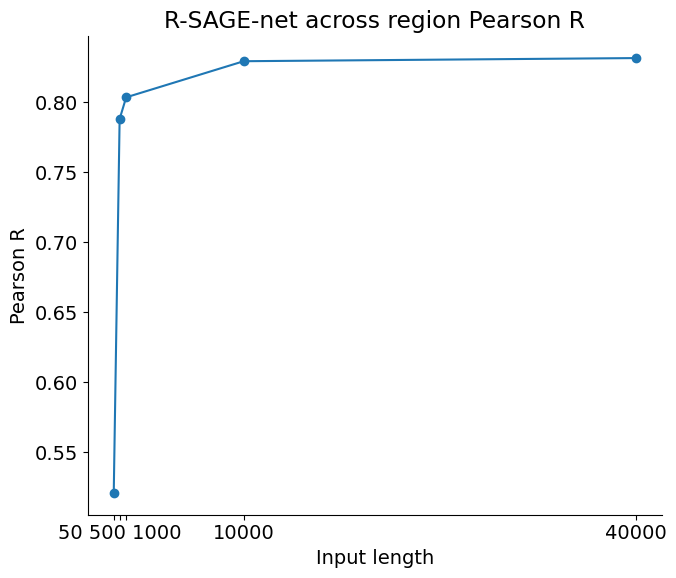

In [7]:
SAGEnet.plot.line_plot_compare(pearsons,xlabels=['', '50 500 1000', '', '10000','40000'], x=[50,500,1000,10000,40000],xlabel='Input length',ylabel='Pearson R', title='R-SAGE-net across region Pearson R',plot_y0=False,fig_width=7)

##### performance by percentile

In [ ]:
all_regions = SAGEnet.tools.select_region_set(enet_path,rand_regions=1,num_regions=100000,top_regions_to_consider=-1)
train_regions, val_regions, test_regions = SAGEnet.tools.get_train_val_test_genes(all_regions, tss_data_path=metadata_path)
print(len(test_regions))

selecting train/val/test gene sets based on chromosome split
7772


In [75]:
rsagenet_dir='/data/aspiro17/DNAm_and_expression/rsagenet/dnam/rosmap/input_len_10000/eval_on_individual/epoch=14-step=108183.ckpt/maf_-1_to_2/test_subs/'
psagenet_20k_dir='/data/aspiro17/DNAm_and_expression/psagenet/dnam/rosmap/psagenet_20k_concat/eval_on_individual/epoch=0.ckpt/maf_-1_to_2/test_subs/'
psagenet_100k_dir='/data/aspiro17/DNAm_and_expression/psagenet/dnam/rosmap/scale_psagenet_concat/26811096/eval_on_individual/epoch=0.ckpt/maf_-1_to_2/test_subs/'

rsagenet_corr=pd.read_csv(f'{rsagenet_dir}pearson_corrs.csv',index_col=0).loc[test_regions]
psagenet_20k_corr=pd.read_csv(f'{psagenet_20k_dir}pearson_corrs.csv',index_col=0).loc[test_regions]
psagenet_100k_corr=pd.read_csv(f'{psagenet_100k_dir}pearson_corrs.csv',index_col=0).loc[test_regions]

comb_res=pd.DataFrame()
comb_res['r-SAGE-net']=rsagenet_corr['pearson']
comb_res[f'p-SAGE-net \n 20k']=psagenet_20k_corr['pearson']
comb_res['p-SAGE-net \n 100k']=psagenet_100k_corr['pearson']
comb_res['PrediXcan']=enet_res.loc[test_regions,'test_pearson']

In [76]:
n_bins=10
percentile_labels = [f'{i/n_bins:.1f}-{(i+1)/n_bins:.1f}' for i in range(n_bins)]

comb_res['percentile_range'] = pd.qcut(comb_res['PrediXcan'], q=n_bins, labels=percentile_labels,duplicates='drop')
comb_res['percentile_range'] = comb_res['percentile_range'].replace({
    '0.0-0.1': '0.0–0.5',
    '0.1-0.2': '0.0–0.5',
    '0.2-0.3': '0.0–0.5',
    '0.3-0.4': '0.0–0.5',
    '0.4-0.5': '0.0–0.5'
})

/tmp/ipykernel_4193589/368896950.py:5: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  comb_res['percentile_range'] = comb_res['percentile_range'].replace({


<Axes: xlabel='PrediXcan percentile', ylabel='Pearson R'>

<Figure size 640x480 with 0 Axes>

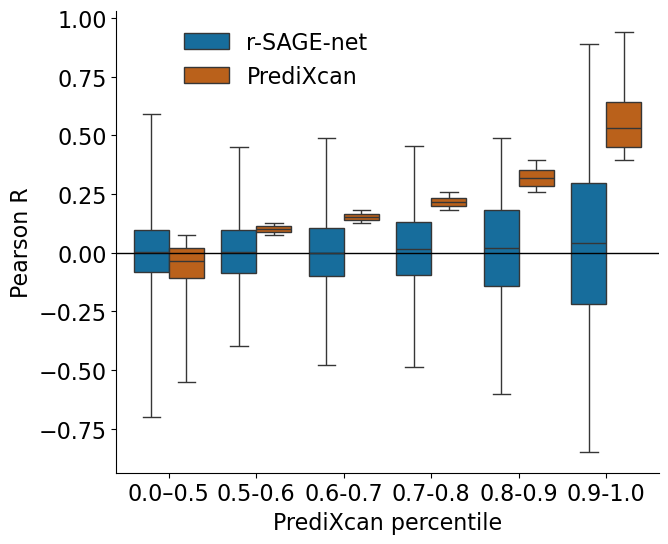

In [77]:
plot_data = comb_res.melt(id_vars='percentile_range', value_vars=['r-SAGE-net','PrediXcan'],
                            var_name='Dataset', value_name='Value')
cb_palette = sb.color_palette("colorblind")
custom_colors = [cb_palette[i] for i in [0, 3]]
hue_order = ['r-SAGE-net', 'PrediXcan'] 
custom_palette = dict(zip(hue_order, custom_colors))
SAGEnet.plot.sb_plot(plot_data,x_col='percentile_range', y_col='Value', hue='Dataset',long_format=True,scatter=False,label_avgs=False,xlabel='PrediXcan percentile',ylabel='Pearson R',fig_width=7,custom_palette=custom_palette,legend_n_col=1)

<Axes: xlabel='PrediXcan percentile', ylabel='Pearson R'>

<Figure size 640x480 with 0 Axes>

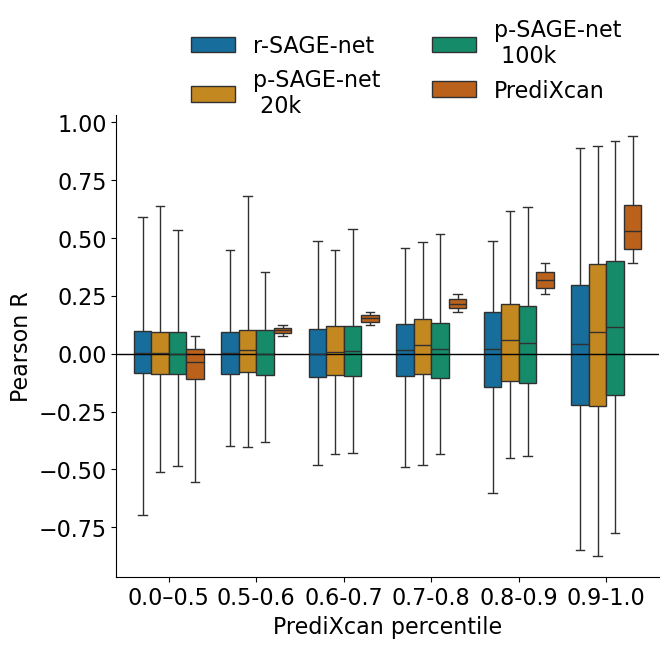

In [78]:
plot_data = comb_res.melt(id_vars='percentile_range', value_vars=['r-SAGE-net','p-SAGE-net \n 20k','p-SAGE-net \n 100k','PrediXcan'],
                            var_name='Dataset', value_name='Value')
cb_palette = sb.color_palette("colorblind")
custom_colors = [cb_palette[i] for i in [0, 1, 2, 3]]
hue_order = ['r-SAGE-net', f'p-SAGE-net \n 20k', f'p-SAGE-net \n 100k', 'PrediXcan'] 
custom_palette = dict(zip(hue_order, custom_colors))
SAGEnet.plot.sb_plot(plot_data,x_col='percentile_range', y_col='Value', hue='Dataset',long_format=True,scatter=False,label_avgs=False,xlabel='PrediXcan percentile',ylabel='Pearson R',fig_width=7,custom_palette=custom_palette,legend_n_col=2,legend_x=.1,legend_y=.95)

##### across individual rsagenet 

In [80]:
corr = pd.read_csv('/data/aspiro17/DNAm_and_expression/rsagenet/dnam/rosmap/summarized_res/input_len_10000/epoch=14-step=108183.ckpt/test_subs/comb_pearson_corr.csv',index_col=0)

sub sampling density for speed


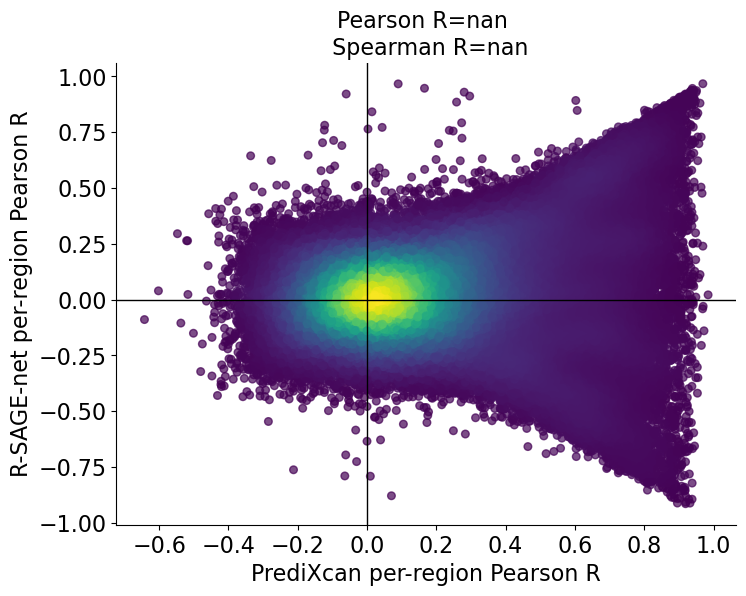

In [82]:
use_regions=corr.index[:100000]
plot_enet=enet_res.loc[use_regions,'test_pearson']
plot_rsagenet=corr.loc[use_regions,'pearson']
pearson, p_val = scipy.stats.pearsonr(plot_enet,plot_rsagenet)
spearman, p_val = scipy.stats.spearmanr(plot_enet,plot_rsagenet)
SAGEnet.plot.scatter_compare(plot_enet,plot_rsagenet,'PrediXcan per-region Pearson R', 'R-SAGE-net per-region Pearson R',auto_title=False,title=f'Pearson R={pearson:.2f} \n Spearman R={spearman:.2f}',fontsize=16,fig_width=8,axes_lines=True)

##### rsagenet across region performance

In [ ]:
all_regions=metadata.index.values
train_regions, val_regions, test_regions = SAGEnet.tools.get_train_val_test_genes(all_regions, tss_data_path=metadata_path)
print(len(test_regions))

selecting train/val/test gene sets based on chromosome split
32284


In [90]:
base_dir='/data/aspiro17/DNAm_and_expression/rsagenet/dnam/rosmap/input_len_10000/eval_on_ref_seq/epoch=14-step=108183.ckpt/'
pred=np.load(f'{base_dir}preds.npy',allow_pickle=True)
all_regions=np.load(f'{base_dir}regions.npy',allow_pickle=True)
pred_df=pd.DataFrame(index=all_regions)
pred_df['pred'] = pred[:,0]
obs=rosmap_y_data.loc[test_regions].mean(axis=1)
pred = pred_df.loc[test_regions]

sub sampling density for speed


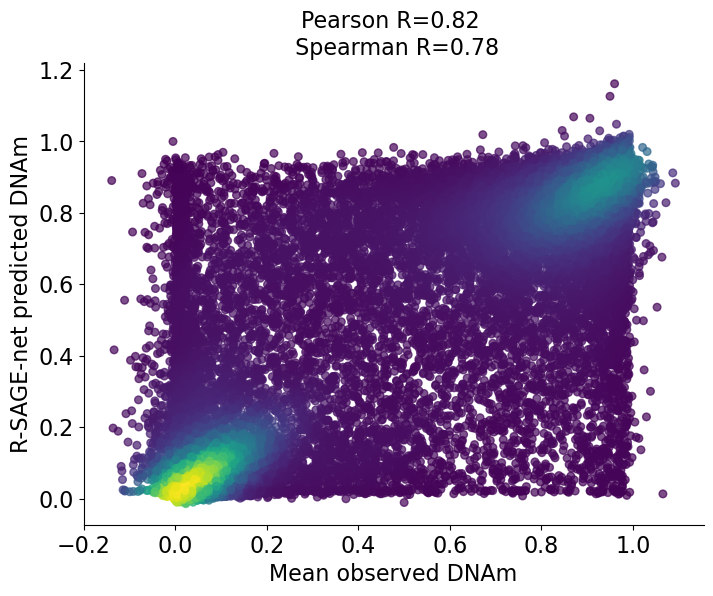

In [91]:
pearson, p_val = scipy.stats.pearsonr(obs,pred['pred'])
spearman, p_val = scipy.stats.spearmanr(obs,pred['pred'])
SAGEnet.plot.scatter_compare(obs,pred['pred'],'Mean observed DNAm', 'R-SAGE-net predicted DNAm',auto_title=False,title=f'Pearson R={pearson:.2f} \n Spearman R={spearman:.2f}',fontsize=16,fig_width=8)

##### across individual model comparison 

In [18]:
all_regions = SAGEnet.tools.select_region_set(enet_path,rand_regions=0,num_regions=5000,top_regions_to_consider=5000)
train_regions, val_regions, test_regions = SAGEnet.tools.get_train_val_test_genes(all_regions, tss_data_path=metadata_path)
print(len(test_regions))

selecting regions from 0 to 5000
selecting train/val/test gene sets based on chromosome split
339


In [24]:
sub_split='test'
rsagenet_base_dir='/data/aspiro17/DNAm_and_expression/rsagenet/dnam/rosmap/summarized_res/'
psagenet_20k_base_dir='/data/aspiro17/DNAm_and_expression/psagenet/dnam/rosmap/psagenet_20k_concat/eval_on_individual/epoch=0.ckpt/no_maf_filter/'
psagenet_100k_base_dir='/data/aspiro17/DNAm_and_expression/psagenet/dnam/rosmap/scale_psagenet_concat/26811096/eval_on_individual/epoch=0.ckpt/no_maf_filter/'

rsagenet=pd.read_csv(f'{rsagenet_base_dir}input_len_10000/epoch=14-step=108183.ckpt/{sub_split}_subs/pearson_corrs.csv',index_col=0)
psagenet_20k=pd.read_csv(f'{psagenet_20k_base_dir}{sub_split}_subs/pearson_corrs.csv',index_col=0)
psagenet_100k=pd.read_csv(f'{psagenet_100k_base_dir}{sub_split}_subs/pearson_corrs.csv',index_col=0)

['3.61e-03', '4.96e-04']


<Axes: xlabel='Model', ylabel='Pearson R'>

<Figure size 640x480 with 0 Axes>

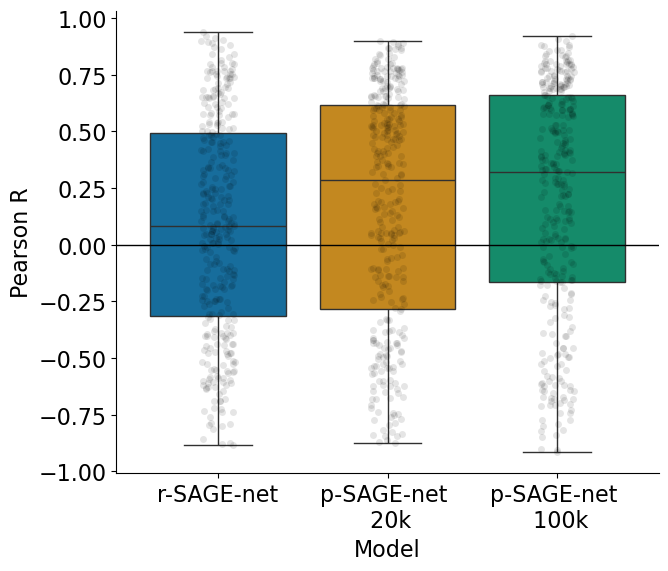

In [20]:
regions=test_regions

pvals = []
for arr in [psagenet_20k,psagenet_100k]:
    stat, p_value = scipy.stats.wilcoxon(rsagenet.loc[regions,'pearson'], arr.loc[regions,'pearson'],alternative='less')
    pvals.append(p_value)
pvals = [f"{p:.2e}" for p in pvals]
print(pvals)

comb=pd.DataFrame(index=regions)
comb['r-SAGE-net']=rsagenet.loc[regions,'pearson']
comb[f'p-SAGE-net \n 20k']=psagenet_20k.loc[regions,'pearson']
comb[f'p-SAGE-net \n 100k']=psagenet_100k.loc[regions,'pearson']

SAGEnet.plot.sb_plot(comb,xlabel='Model',ylabel='Pearson R',label_avgs=False,fig_width=7,title_pad=50)

['0.00e+00', '4.32e-30']


<Axes: xlabel='Model', ylabel='Pearson R'>

<Figure size 640x480 with 0 Axes>

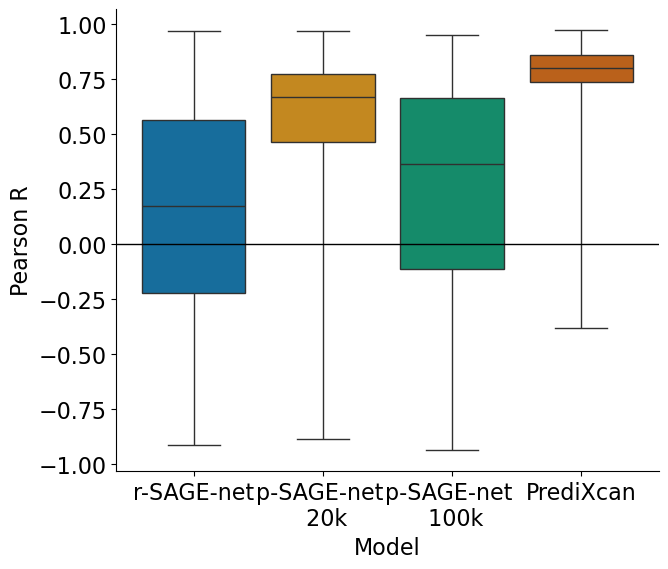

In [27]:
regions=train_regions

pvals = []
for arr in [psagenet_20k,psagenet_100k]:
    stat, p_value = scipy.stats.wilcoxon(rsagenet.loc[regions,'pearson'], arr.loc[regions,'pearson'],alternative='less')
    pvals.append(p_value)
pvals = [f"{p:.2e}" for p in pvals]
print(pvals)

comb=pd.DataFrame(index=regions)
comb['r-SAGE-net']=rsagenet.loc[regions,'pearson']
comb[f'p-SAGE-net \n 20k']=psagenet_20k.loc[regions,'pearson']
comb[f'p-SAGE-net \n 100k']=psagenet_100k.loc[regions,'pearson']
comb[f'PrediXcan']=enet_res.loc[regions,'test_pearson']

SAGEnet.plot.sb_plot(comb,xlabel='Model',ylabel='Pearson R',label_avgs=False,fig_width=7,title_pad=50,scatter=False)

#### Geuvadis

selecting train/val/test gene sets based on chromosome split
631


<Axes: title={'center': 'Train gene (n=631) per gene Pearson R'}, xlabel='Model and individual split', ylabel='Pearson R'>

<Figure size 640x480 with 0 Axes>

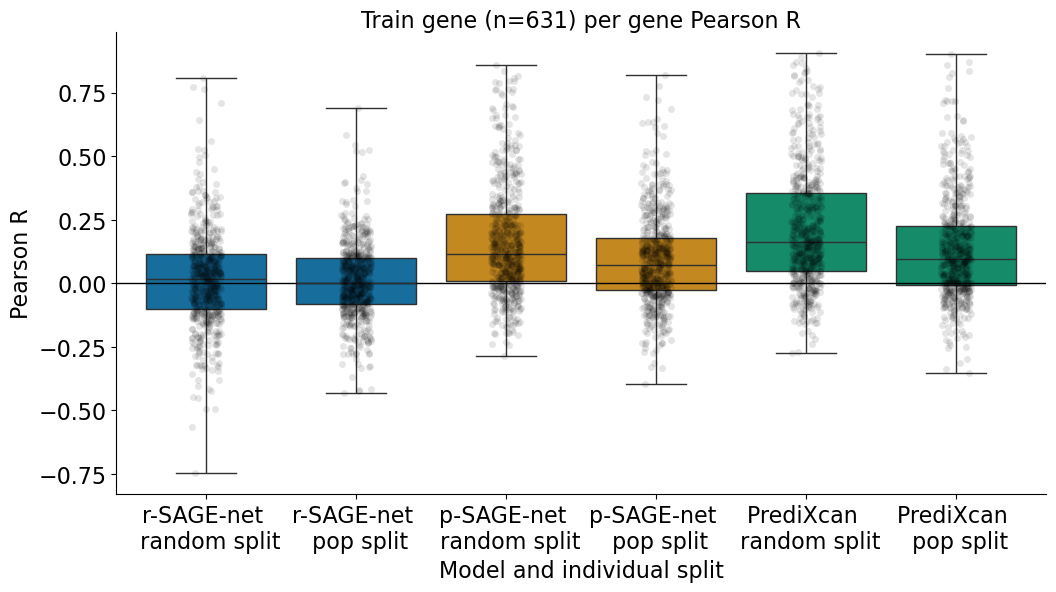

In [7]:
tss_data_path='/homes/gws/aspiro17/SAGEnet/input_data/gene-ids-and-positions.tsv'
geuvadis_pop_dir='/data/mostafavilab/personal_genome_expr/revisions/GEUVADIS/models/geuvadis_population/26707523/psagenet_model/metric_train_gene_gene/eval_on_individual/snps_and_indels/no_maf_filter/geuvadis/test_subs/epoch=6.ckpt/'
geuvadis_rand_dir='/data/mostafavilab/personal_genome_expr/revisions/GEUVADIS/models/geuvadis_random/26707524/psagenet_model/metric_train_gene_gene/eval_on_individual/snps_and_indels/no_maf_filter/geuvadis/test_subs/epoch=9.ckpt/'
rsagenet_pop_dir='/data/mostafavilab/personal_genome_expr/revisions/GEUVADIS/models/rsagenet/job0/rsagenet_model/eval_on_individual/snps_and_indels/no_maf_filter/geuvadis/population_test_subs/'
rsagenet_rand_dir='/data/mostafavilab/personal_genome_expr/revisions/GEUVADIS/models/rsagenet/job0/rsagenet_model/eval_on_individual/snps_and_indels/no_maf_filter/geuvadis/random_test_subs/'
expr_data_path='/data/mostafavilab/personal_genome_expr/revisions/GEUVADIS/corrected_log_tpm.annot.csv.gz'
expr_data = pd.read_csv(expr_data_path, index_col=0)
expr_data.index=expr_data['stable_id']
geuvadis_pop=pd.read_csv(f'{geuvadis_pop_dir}per_gene_pearson_corr.csv',index_col=0)
geuvadis_random=pd.read_csv(f'{geuvadis_rand_dir}per_gene_pearson_corr.csv',index_col=0)
rsagenet_pop=pd.read_csv(f'{rsagenet_pop_dir}per_gene_pearson_corr.csv',index_col=0)
rsagenet_random=pd.read_csv(f'{rsagenet_rand_dir}per_gene_pearson_corr.csv',index_col=0)
train_gene_list, _ , _ = SAGEnet.tools.get_train_val_test_genes(geuvadis_pop.index, tss_data_path=tss_data_path)
print(len(train_gene_list))

predixcan_pop_res_dir='/data/mostafavilab/personal_genome_expr/revisions/GEUVADIS/predixcan/population/40000/maf_filter_0.01/'
population_sub_data_dir='/homes/gws/aspiro17/SAGEnet-revisions/input_data/individual_sets/GEUVADIS/population/'
predixcan_random_res_dir='/data/mostafavilab/personal_genome_expr/revisions/GEUVADIS/predixcan/random/40000/maf_filter_0.01/'
random_sub_data_dir='/homes/gws/aspiro17/SAGEnet-revisions/input_data/individual_sets/GEUVADIS/random/'
population_corr=pd.read_csv(f'{predixcan_pop_res_dir}/pearson_corrs.csv',index_col=0)
random_corr=pd.read_csv(f'{predixcan_random_res_dir}/pearson_corrs.csv',index_col=0)

train_gene_list=population_corr.index
comb_res=pd.DataFrame(index=train_gene_list)
comb_res[f'r-SAGE-net \n random split'] = rsagenet_random.loc[train_gene_list,'pearson']
comb_res[f'r-SAGE-net \n pop split'] = rsagenet_pop.loc[train_gene_list,'pearson']
comb_res[f'p-SAGE-net \n random split'] = geuvadis_random.loc[train_gene_list,'pearson']
comb_res[f'p-SAGE-net \n pop split'] = geuvadis_pop.loc[train_gene_list,'pearson']
comb_res[f'PrediXcan \n random split'] = random_corr.loc[train_gene_list,'test']
comb_res[f'PrediXcan \n pop split'] = population_corr.loc[train_gene_list,'test']

custom_palette = {
    f'r-SAGE-net \n random split': sb.color_palette('colorblind')[0],
    f'r-SAGE-net \n pop split': sb.color_palette('colorblind')[0],
    f'p-SAGE-net \n random split': sb.color_palette('colorblind')[1],
    f'p-SAGE-net \n pop split': sb.color_palette('colorblind')[1],
    f'PrediXcan \n random split': sb.color_palette('colorblind')[2],
    f'PrediXcan \n pop split': sb.color_palette('colorblind')[2]}

SAGEnet.plot.sb_plot(comb_res,fig_width=12,ylabel='Pearson R',xlabel='Model and individual split',custom_palette=custom_palette,title=f'Train gene (n={len(comb_res)}) per gene Pearson R')